# EDA_ Prediccion de ataque cardiaco

# Descripción

#### Este conjunto de datos contiene 8763 registros de pacientes de todo el mundo, con información sobre salud cardiovascular y estilo de vida, como edad, colesterol, presión arterial, diabetes, tabaquismo, obesidad y ejercicio. Incluye también aspectos médicos y socioeconómicos. Su objetivo es predecir la presencia o ausencia de riesgo de ataque cardíaco mediante análisis con todos los datos y variables proporcionadas.

In [235]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from bootcampviztools import plot_categorical_numerical_relationship, plot_combined_graphs, \
    pinta_distribucion_categoricas, plot_grouped_boxplots, plot_categorical_relationship_fin, plot_grouped_histograms, \
        grafico_dispersion_con_correlacion, bubble_plot, plot_multiple_boxplots, plot_categorical_relationship_fin 
        

In [236]:
df_heart= pd.read_csv("./data/dataset_heart_attack.csv")

#### Limpieza de Datos

##### Antes de profundizar en el análisis, es fundamental realizar una limpieza de datos. Este paso garantiza que trabajemos con información precisa y sin inconsistencias. La limpieza consiste en varias tareas clave:

##### Identificar y tratar valores nulos:
##### Buscamos columnas que contengan valores faltantes. Según el caso, podemos:

##### Rellenar esos valores con la media, la mediana o la moda (dependiendo del tipo de variable).

##### Eliminar filas o columnas si el porcentaje de valores nulos es demasiado alto.

##### Detectar y eliminar duplicados:
##### Revisamos si existen filas repetidas en el dataset y las eliminamos para evitar que distorsionen el análisis.

##### Eliminar columnas innecesarias:
##### Algunas columnas no aportan valor al análisis o pueden ser irrelevantes para nuestro objetivo (por ejemplo, identificadores únicos, localización geográfica o cualquier dato que no esté relacionado con el riesgo de ataque cardíaco). Estas columnas se eliminan para simplificar y enfocar el análisis.

In [237]:
df_heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Patient ID                       8763 non-null   object 
 1   Age                              8763 non-null   int64  
 2   Sex                              8763 non-null   object 
 3   Cholesterol                      8763 non-null   int64  
 4   Blood Pressure                   8763 non-null   object 
 5   Heart Rate                       8763 non-null   int64  
 6   Diabetes                         8763 non-null   int64  
 7   Family History                   8763 non-null   int64  
 8   Smoking                          8763 non-null   int64  
 9   Obesity                          8763 non-null   int64  
 10  Alcohol Consumption              8763 non-null   int64  
 11  Exercise Hours Per Week          8763 non-null   float64
 12  Diet                

In [238]:
df_heart.dropna(inplace=True)
df_heart.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8755 entries, 0 to 8762
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Patient ID                       8755 non-null   object 
 1   Age                              8755 non-null   int64  
 2   Sex                              8755 non-null   object 
 3   Cholesterol                      8755 non-null   int64  
 4   Blood Pressure                   8755 non-null   object 
 5   Heart Rate                       8755 non-null   int64  
 6   Diabetes                         8755 non-null   int64  
 7   Family History                   8755 non-null   int64  
 8   Smoking                          8755 non-null   int64  
 9   Obesity                          8755 non-null   int64  
 10  Alcohol Consumption              8755 non-null   int64  
 11  Exercise Hours Per Week          8755 non-null   float64
 12  Diet                     

In [239]:
print(df_heart.isnull().sum())

Patient ID                         0
Age                                0
Sex                                0
Cholesterol                        0
Blood Pressure                     0
Heart Rate                         0
Diabetes                           0
Family History                     0
Smoking                            0
Obesity                            0
Alcohol Consumption                0
Exercise Hours Per Week            0
Diet                               0
Previous Heart Problems            0
Medication Use                     0
Stress Level                       0
Sedentary Hours Per Day            0
Income                             0
BMI                                0
Triglycerides                      0
Physical Activity Days Per Week    0
Sleep Hours Per Day                0
Country                            0
Continent                          0
Hemisphere                         0
Heart Attack Risk                  0
dtype: int64


In [240]:
print(f"Number of duplicate rows: {df_heart.duplicated().sum()}")

Number of duplicate rows: 0


In [241]:
df_heart.columns

Index(['Patient ID', 'Age', 'Sex', 'Cholesterol', 'Blood Pressure',
       'Heart Rate', 'Diabetes', 'Family History', 'Smoking', 'Obesity',
       'Alcohol Consumption', 'Exercise Hours Per Week', 'Diet',
       'Previous Heart Problems', 'Medication Use', 'Stress Level',
       'Sedentary Hours Per Day', 'Income', 'BMI', 'Triglycerides',
       'Physical Activity Days Per Week', 'Sleep Hours Per Day', 'Country',
       'Continent', 'Hemisphere', 'Heart Attack Risk'],
      dtype='object')

In [242]:
df_heart.head(5)

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,BMW7812,67,Male,208,158/88,72,0,0,1,0,...,6.615001,261404.0,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0
1,CZE1114,21,Male,389,165/93,98,1,1,1,1,...,4.963459,285768.0,27.194973,235,1,7,Canada,North America,Northern Hemisphere,1
2,BNI9906,21,Female,324,174/99,72,1,0,0,0,...,9.463426,235282.0,28.176571,587,4,4,France,Europe,Northern Hemisphere,1
3,JLN3497,84,Male,383,163/100,73,1,1,1,0,...,7.648981,125640.0,36.464704,378,3,4,Canada,North America,Northern Hemisphere,1
4,GFO8847,66,Male,318,91/88,93,1,1,1,1,...,1.514821,160555.0,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,1


In [243]:
df_heart.drop(columns=["Hemisphere","BMI"],inplace=True)
df_heart.columns


Index(['Patient ID', 'Age', 'Sex', 'Cholesterol', 'Blood Pressure',
       'Heart Rate', 'Diabetes', 'Family History', 'Smoking', 'Obesity',
       'Alcohol Consumption', 'Exercise Hours Per Week', 'Diet',
       'Previous Heart Problems', 'Medication Use', 'Stress Level',
       'Sedentary Hours Per Day', 'Income', 'Triglycerides',
       'Physical Activity Days Per Week', 'Sleep Hours Per Day', 'Country',
       'Continent', 'Heart Attack Risk'],
      dtype='object')

In [244]:
df_heart = df_heart.rename(columns={"Sex": "Genero"})

##### Antes de seguir analizando, es importante clasificar nuestras variables según su tipo. Nos referimos al tipo conceptual:

##### Porque cada tipo de variable se analiza y procesa de forma diferente. Por ejemplo, las numéricas se resumen con medias y medianas, mientras que las categóricas se estudian con frecuencias y proporciones. Así que, en este paso, vamos a clasificar nuestras columnas para poder hacer un análisis más ordenado y efectivo después.

In [245]:
df_tipificacion = pd.DataFrame([df_heart.nunique(), df_heart.nunique()/len(df_heart) * 100, df_heart.dtypes]).T.rename(columns = {0: "Card",\
                                                                                                                                 1: "%_Card", 2: "Tipo"})
df_tipificacion

,Card,%_Card,Tipo
Patient ID,8755,100.0,object
Age,73,0.833809,int64
Genero,2,0.022844,object
Cholesterol,281,3.209595,int64
Blood Pressure,3914,44.705882,object
Heart Rate,71,0.810965,int64
Diabetes,2,0.022844,int64
Family History,2,0.022844,int64
Smoking,2,0.022844,int64
Obesity,2,0.022844,int64


In [246]:
df_tipificacion["Clasificada_como"] = "Categorica" 
df_tipificacion.loc[df_tipificacion.Card == 2, "Clasificada_como"] = "Binaria"
df_tipificacion.loc[df_tipificacion["Card"] > 20, "Clasificada_como"] ="Numerica Discreta"
df_tipificacion.loc[df_tipificacion["%_Card"] > 5, "Clasificada_como"] = "Numerica Continua"
df_tipificacion

,Card,%_Card,Tipo,Clasificada_como
Patient ID,8755,100.0,object,Numerica Continua
Age,73,0.833809,int64,Numerica Discreta
Genero,2,0.022844,object,Binaria
Cholesterol,281,3.209595,int64,Numerica Discreta
Blood Pressure,3914,44.705882,object,Numerica Continua
Heart Rate,71,0.810965,int64,Numerica Discreta
Diabetes,2,0.022844,int64,Binaria
Family History,2,0.022844,int64,Binaria
Smoking,2,0.022844,int64,Binaria
Obesity,2,0.022844,int64,Binaria


In [247]:
df_heart.columns

Index(['Patient ID', 'Age', 'Genero', 'Cholesterol', 'Blood Pressure',
       'Heart Rate', 'Diabetes', 'Family History', 'Smoking', 'Obesity',
       'Alcohol Consumption', 'Exercise Hours Per Week', 'Diet',
       'Previous Heart Problems', 'Medication Use', 'Stress Level',
       'Sedentary Hours Per Day', 'Income', 'Triglycerides',
       'Physical Activity Days Per Week', 'Sleep Hours Per Day', 'Country',
       'Continent', 'Heart Attack Risk'],
      dtype='object')

| Nombre del campo                  | Descripción                                                                 | Tipo de variable     | Importancia Inicial  | Notas |
|-----------------------------------|----------------------------------------------------------------------------|-----------------------|----------------------|-------|
| Patient ID                        | ID del paciente                                                            | Indice unico          | -                    |       |
| Age                               | Edad del paciente                                                          | Numérica Continua     | 2                    |       |
| Genero                               | Sexo del paciete                                                           | Categorica              | 1                    |       |
| Cholesterol                       | Niveles de colesterol de paciente                                          | Numerica Discreta     | 0                    |       |
| Blood Pressure                    | Presion arterial del paciente                                              | Numerica Continua     | 0                    |       |
| Heart Rate                        | Frecuencia cardiaca del paciente                                           | Numerica Discreta     | 3                    |       |
| Diabetes                          | Diabetes                                                                   | Binaria               | 0                    |       |
| Family History                    | Estado laboral del cliente                                                 | Binaria               | 2                    |       |
| Smoking                           | Fuma el paciente                                                           | Binaria               | 1                    |       |
| Obesity                           | Tiene obecidad el paciente (1: Obesidad, 0: No obesidad)                   | Binaria               | 1                    |       |
| Alcohol Consumption               | Consume alcohol (None/Light/Moderate/Heavy)                                | Binaria               | 2                    |       |
| Exercise Hours Per Week           | Horas de ejercicio por semana                                              | Numerica Continua     | 1                    |       |
| Diet                              | Habitos alimenticios del paciente(Healthy/Average/Unhealthy)               | Categorica            | 2                    |       |
| Previous Heart Problems           | Algun antecedente anterior (1: Yes, 0: No)                                 | Binaria               | 1                    |       |
| Medication Use                    | El paciente usa algun medicamento (1: Yes, 0: No)                          | Binaria               | 3                    |       |
| Stress Level                      | Nivel de estres (1-10)                                                     | Categorica            | 2                    |       |
| Sedentary Hours Per Day           | Horas de sedentarismo por dia                                              | Numerica Continua     | 2                    |       |
| Income                            | Ingresos del paciente                                                      | Numerica Continua     | 2                    |       |
| Triglycerides                     | Niveles de trigliceridos del paciente                                      | Numerica Continua     | 1                    |       |
| Physical Activity Days Per Week   | Dias de actividad fisica por semana                                        | Categórica            | 2                    |       |
| Sleep Hours Per Day               | Horas de sueño por dia                                                     | Categorica            | 2                    |       |
| Country                           | Pais del paciente                                                          | Categórica            | 2                    |       |
| Continent                         | Continente del paciente                                                    | Categórica            | 1                    |       |
| Heart Attack Risk                 | Presencia de riesgo de ataque cardíaco (1: Sí, 0: No)                      | Binaria               | 0

#### Obtenemos un resumen estadístico de las columnas numéricas de nuestro DataFrame.
##### * Nos ayuda a entender la distribución de cada variable.
##### * Permite detectar valores atípicos (outliers) al comparar el min, max y los cuartiles.
##### * Sirve como primer paso para decidir si es necesario normalizar, estandarizar o transformar los datos.

In [248]:
df_heart.describe()

,Age,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Previous Heart Problems,Medication Use,Stress Level,Sedentary Hours Per Day,Income,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Heart Attack Risk
count,8755.000000,8755.000000,8755.000000,8755.000000,8755.000000,8755.000000,8755.000000,8755.000000,8755.000000,8755.000000,8755.000000,8755.000000,8755.000000,8755.000000,8755.000000,8755.000000,8755.000000,8755.000000
mean,53.710109,259.907938,75.019760,0.652313,0.492975,0.896973,0.501314,0.598058,10.013977,0.495717,0.498344,5.467961,5.991706,158260.555797,417.719475,3.490120,7.023301,0.592690
std,21.249780,80.827869,20.552066,0.476263,0.499979,0.304011,0.500027,0.490318,5.783809,0.500010,0.500026,2.859072,3.466438,80574.380529,223.704091,2.282932,1.988292,0.491362
min,18.000000,120.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002442,0.000000,0.000000,1.000000,0.001263,20062.000000,30.000000,0.000000,4.000000,0.000000
25%,35.000000,192.000000,57.000000,0.000000,0.000000,1.000000,0.000000,0.000000,4.979900,0.000000,0.000000,3.000000,2.995074,88310.000000,226.000000,2.000000,5.000000,0.000000
50%,54.000000,259.000000,75.000000,1.000000,0.000000,1.000000,1.000000,1.000000,10.069559,0.000000,0.000000,5.000000,5.921229,157866.000000,417.000000,3.000000,7.000000,1.000000
75%,72.000000,330.000000,93.000000,1.000000,1.000000,1.000000,1.000000,1.000000,15.050018,1.000000,1.000000,8.000000,9.018324,227786.500000,612.000000,5.000000,9.000000,1.000000
max,90.000000,400.000000,110.000000,1.000000,1.000000,1.000000,1.000000,1.000000,19.998709,1.000000,1.000000,10.000000,11.999313,299954.000000,800.000000,7.000000,10.000000,1.000000


In [249]:
variables_categoricas = [
    "Genero",
    "Diet",
    "Stress Level",
    "Physical Activity Days Per Week",
    "Sleep Hours Per Day",
    "Country",
    "Continent"
]

#### Calcular la moda (el valor que más se repite) de cada variable categórica en nuestro conjunto de datos.

##### Nos ayuda a entender cuál es la categoría más común en cada variable (por ejemplo, el género más frecuente, o si la mayoría fuma o no).
##### Nos da una idea inicial de la distribución de las categorías en el dataset.

In [250]:
df_heart[variables_categoricas].mode().T

,0
Genero,Male
Diet,Healthy
Stress Level,2
Physical Activity Days Per Week,3
Sleep Hours Per Day,10
Country,Germany
Continent,Asia



### Graficar la distribución absoluta y relativa (las frecuencias) de cada variable categórica y variable binaria.

#### La idea es que visualices rápidamente cuántas veces aparece cada categoría

#### Nos permite explorar los datos categóricos de forma visual  permite detectar si las categorías están desbalanceadas (por ejemplo, si hay muchos más hombres que mujeres en el dataset), también ayuda a detectar valores raros (por ejemplo, si hay una categoría mal escrita o valores faltantes).

#### Es muy útil como primer paso en el análisis exploratorio (lo que llamamos EDA: Exploratory Data Analysis).

In [251]:
for catego in variables_categoricas:
    print(f"Para{catego}")
    print(df_heart[catego].value_counts())
    print("\n"*2)

ParaGenero
Genero
Male      6107
Female    2648
Name: count, dtype: int64



ParaDiet
Diet
Healthy      2956
Average      2910
Unhealthy    2889
Name: count, dtype: int64



ParaStress Level
Stress Level
2     913
4     910
7     903
9     886
8     878
3     866
1     865
5     860
6     854
10    820
Name: count, dtype: int64



ParaPhysical Activity Days Per Week
Physical Activity Days Per Week
3    1141
1    1118
2    1109
7    1094
5    1079
4    1075
6    1074
0    1065
Name: count, dtype: int64



ParaSleep Hours Per Day
Sleep Hours Per Day
10    1291
8     1287
6     1274
7     1270
5     1262
9     1191
4     1180
Name: count, dtype: int64



ParaCountry
Country
Germany           477
Argentina         470
Brazil            462
United Kingdom    457
Australia         449
Nigeria           448
France            446
Canada            439
China             434
New Zealand       434
Japan             433
Italy             431
Spain             429
Colombia          429
Thailand    

In [252]:
for catego in variables_categoricas:
    print(f"Para{catego}")
    print(df_heart[catego].value_counts()/len(df_heart)*100)
    print("\n"*2)

ParaGenero
Genero
Male      69.754426
Female    30.245574
Name: count, dtype: float64



ParaDiet
Diet
Healthy      33.763564
Average      33.238150
Unhealthy    32.998287
Name: count, dtype: float64



ParaStress Level
Stress Level
2     10.428327
4     10.394061
7     10.314106
9     10.119931
8     10.028555
3      9.891491
1      9.880069
5      9.822958
6      9.754426
10     9.366077
Name: count, dtype: float64



ParaPhysical Activity Days Per Week
Physical Activity Days Per Week
3    13.032553
1    12.769846
2    12.667047
7    12.495717
5    12.324386
4    12.278698
6    12.267276
0    12.164477
Name: count, dtype: float64



ParaSleep Hours Per Day
Sleep Hours Per Day
10    14.745860
8     14.700171
6     14.551685
7     14.505997
5     14.414620
9     13.603655
4     13.478013
Name: count, dtype: float64



ParaCountry
Country
Germany           5.448315
Argentina         5.368361
Brazil            5.276985
United Kingdom    5.219874
Australia         5.128498
Nigeria        

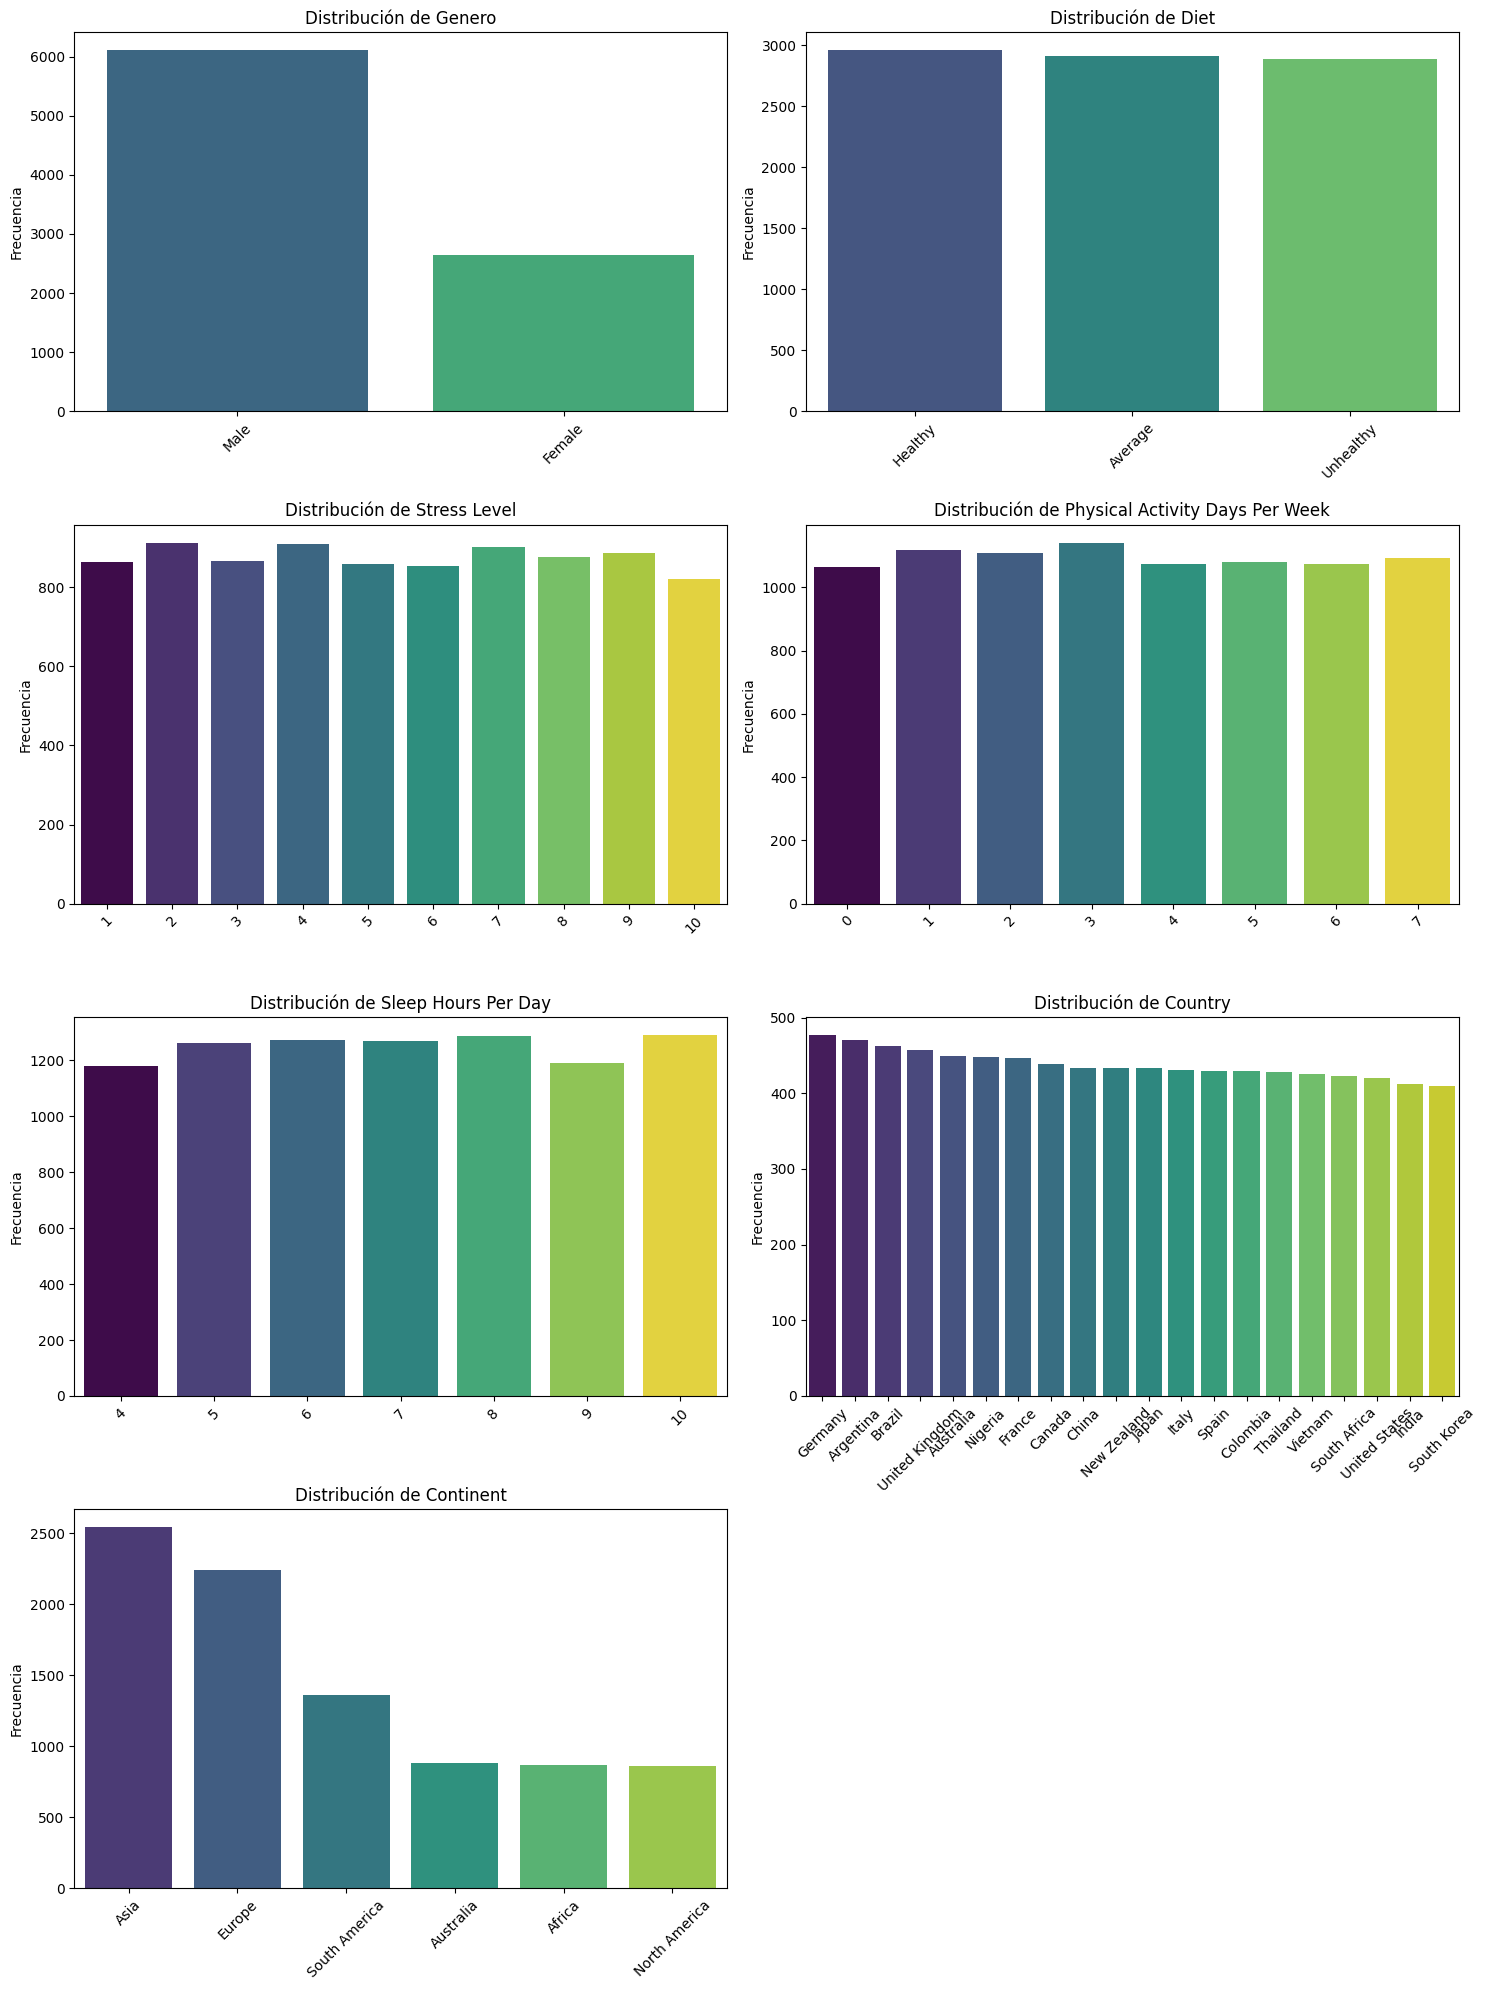

In [253]:
pinta_distribucion_categoricas(df_heart, variables_categoricas)

In [234]:
plt.savefig("distribucion_categoricas.png")
plt.close()

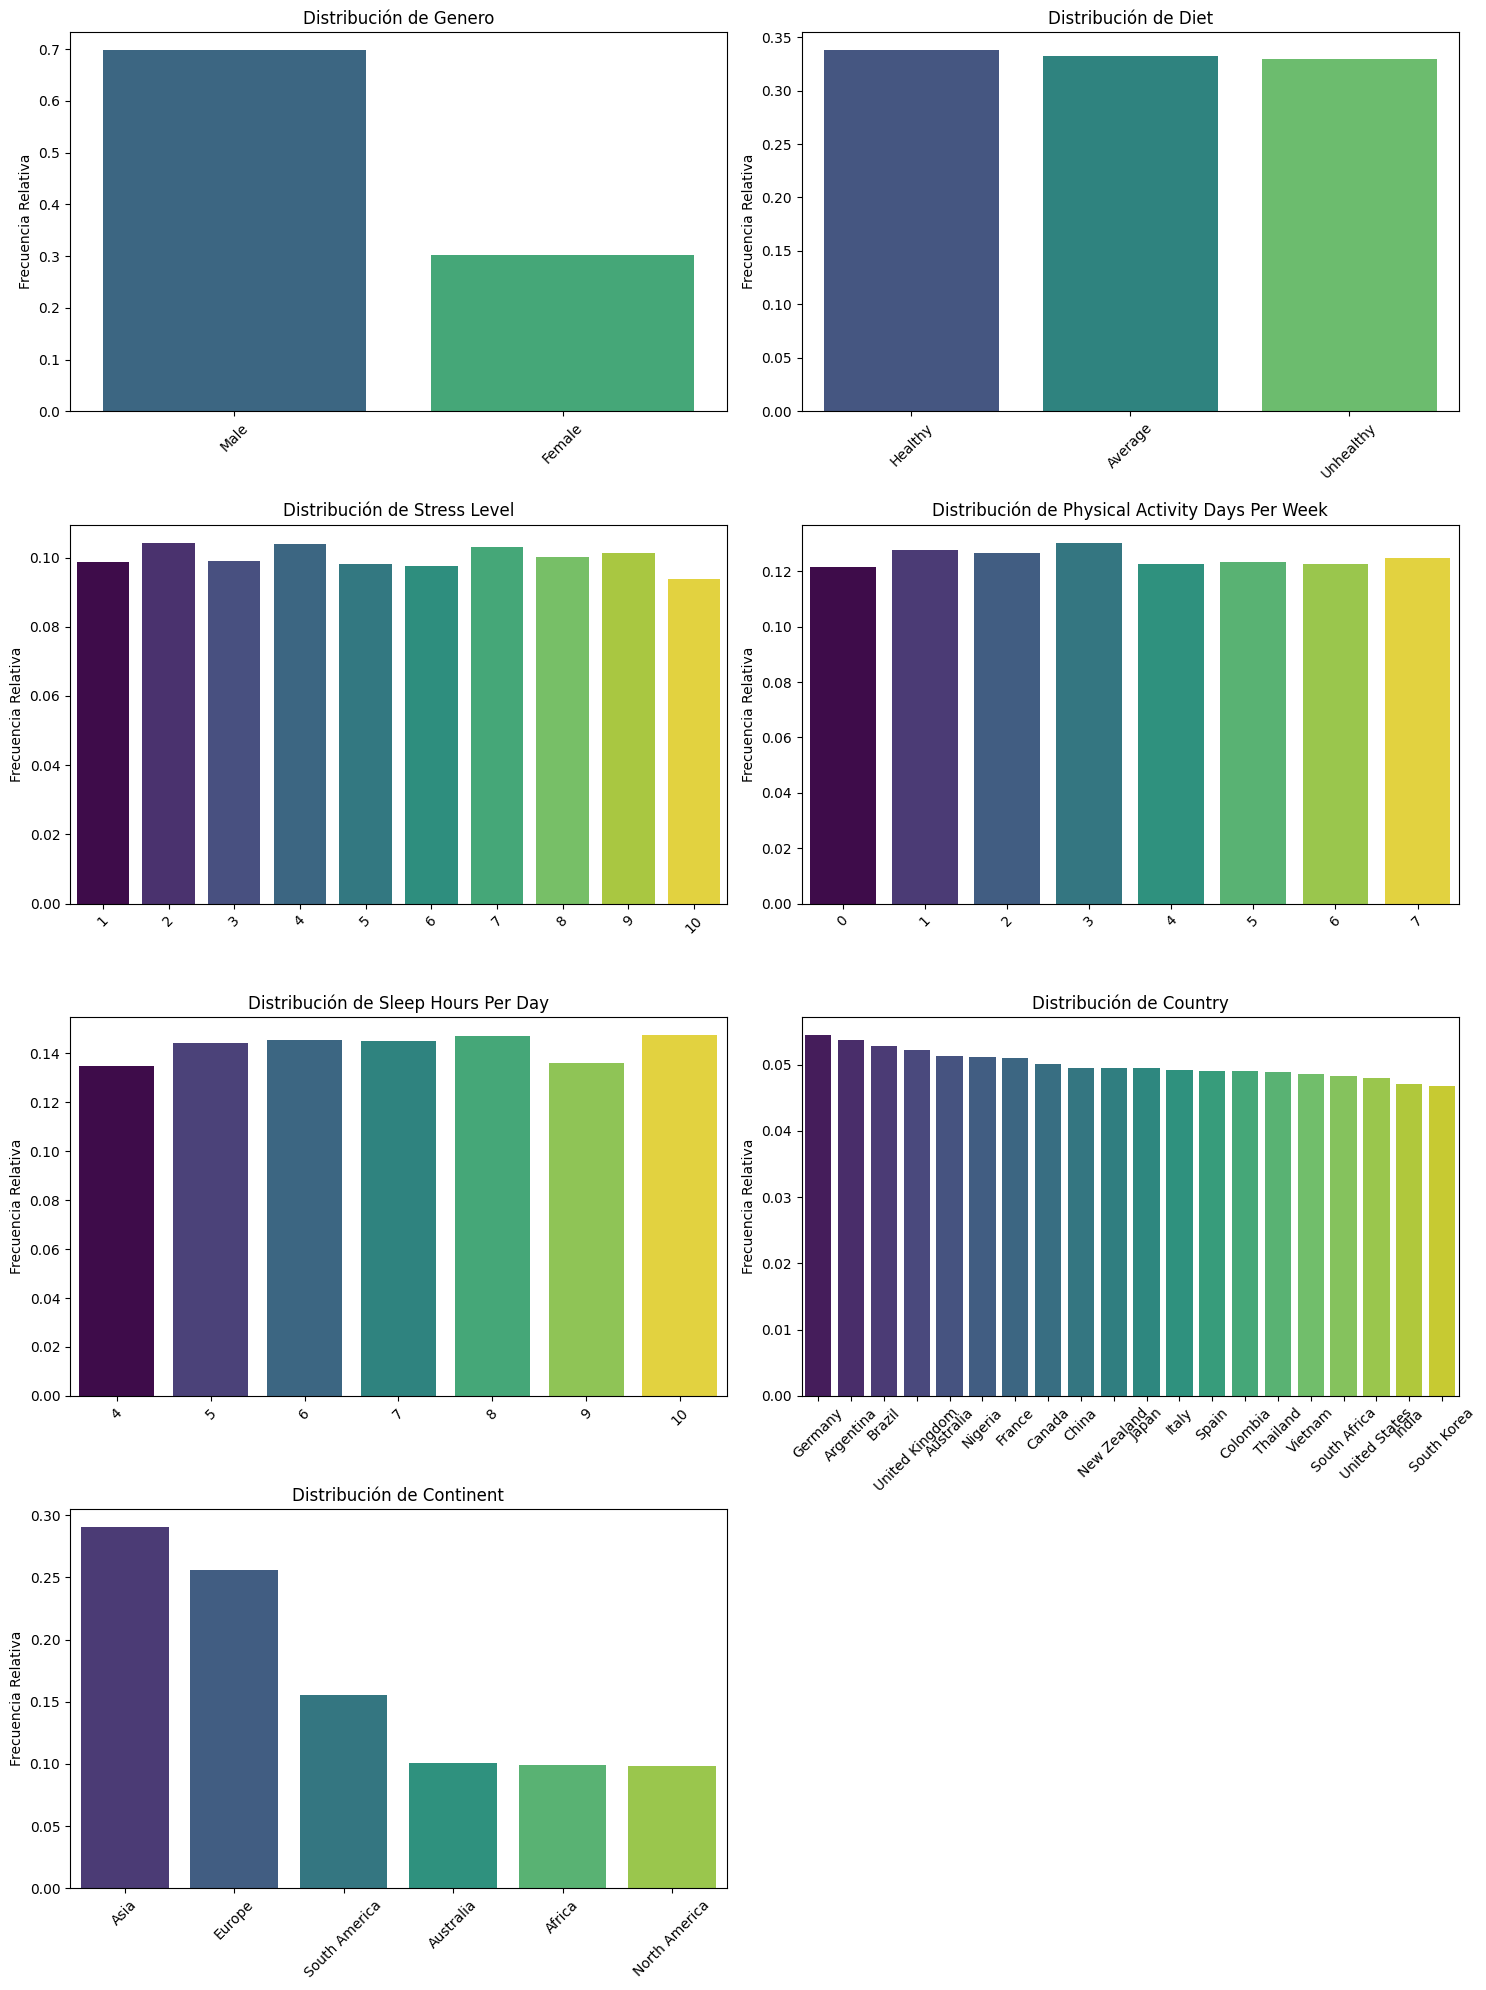

In [20]:
pinta_distribucion_categoricas(df_heart, variables_categoricas, relativa= True)

### Analisis variables Binarias

In [21]:
binarias_columnas = ["Diabetes","Smoking","Obesity","Alcohol Consumption","Previous Heart Problems","Heart Attack Risk"]

In [23]:
tabla_frecuencias = pd.DataFrame()

for catego in binarias_columnas:
    frecuencias = df_heart[catego].value_counts()
    tabla_frecuencias[catego] = frecuencias

tabla_frecuencias

,Diabetes,Smoking,Obesity,Alcohol Consumption,Previous Heart Problems,Heart Attack Risk
Diabetes,,,,,,
1,5711,7853,4389,5236,4340,5189
0,3044,902,4366,3519,4415,3566


In [24]:
tabla_frecuencias.to_excel("frecuencias_binarias.xlsx", index=True)

In [543]:
tabla_frecuencias_relativas = pd.DataFrame()

for catego in binarias_columnas:
    frecuencias = df_heart[catego].value_counts(normalize=True) * 100
    tabla_frecuencias_relativas[catego] = frecuencias.round(2)  # Redondear a 2 decimales

tabla_frecuencias_relativas

,Diabetes,Smoking,Obesity,Alcohol Consumption,Previous Heart Problems,Heart Attack Risk
Diabetes,,,,,,
1,65.23,89.7,50.13,59.81,49.57,59.27
0,34.77,10.3,49.87,40.19,50.43,40.73


In [25]:

def plot_frecuencias(df, binarias_columnas):
    # Definir el número de gráficas y la cantidad de filas necesarias
    num_columnas = 2
    filas = (len(binarias_columnas) + num_columnas - 1) // num_columnas 
    fig, axes = plt.subplots(filas, num_columnas, figsize=(10, 15))
    axes = axes.flatten()  # Aplanar para facilitar el acceso
    for i, column in enumerate(binarias_columnas):
        sns.countplot(data=df, x=column, ax=axes[i])
        axes[i].set_title((f"Frecuencias Absolutas de {column}"))
    plt.show()   

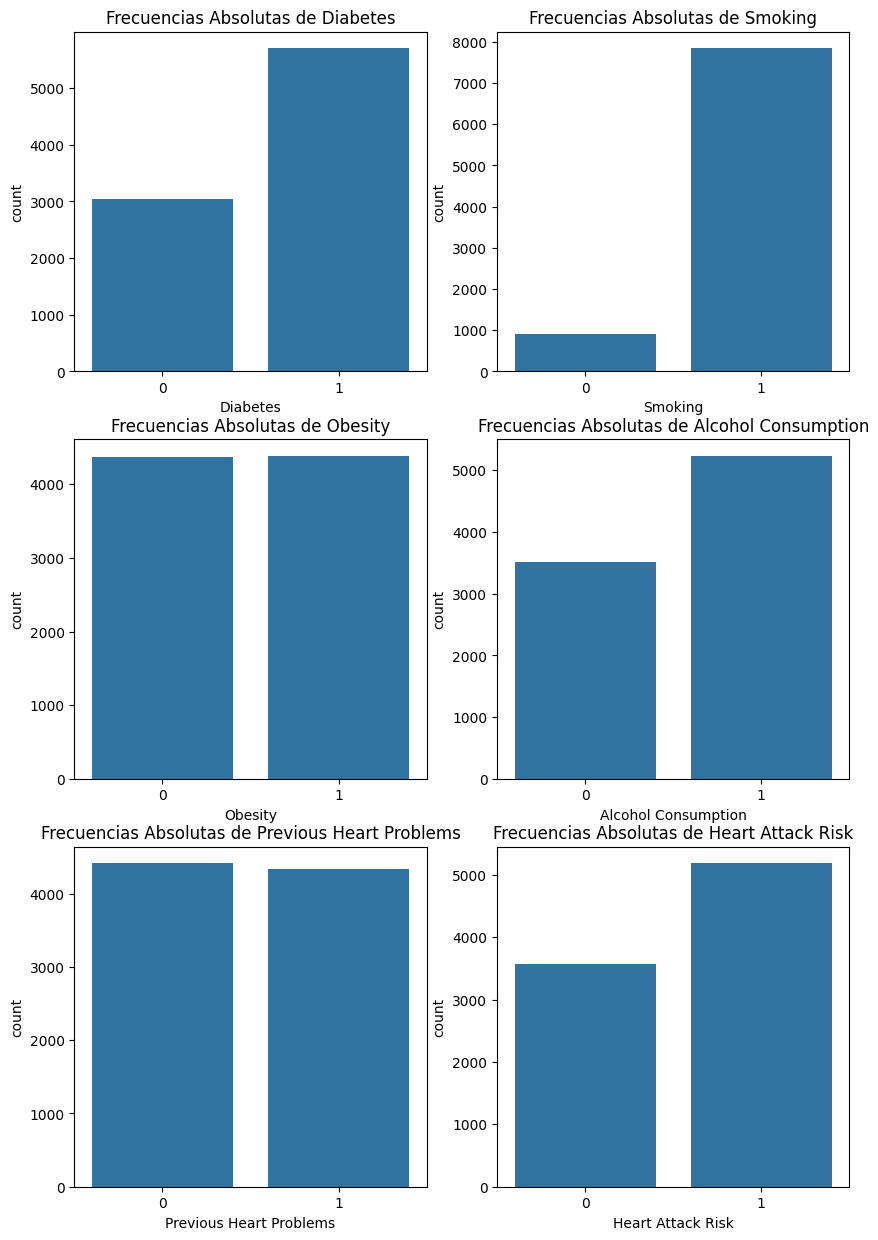

In [26]:
plot_frecuencias(df_heart,binarias_columnas)

In [27]:
def plot_frecuencias_relativas(df, binarias_columnas):
    # Definir el número de gráficas y la cantidad de filas necesarias
    num_columnas = 2
    filas = (len(binarias_columnas) + num_columnas - 1) // num_columnas 
    fig, axes = plt.subplots(filas, num_columnas, figsize=(10, 15))
    axes = axes.flatten()  # Aplanar para facilitar el acceso
    
    for i, column in enumerate(binarias_columnas):
        # Calcular frecuencias relativas
        valores = df[column].value_counts(normalize=True) * 100
        
        # Crear gráfico de barras
        sns.barplot(x=valores.index, y=valores.values, ax=axes[i])
        axes[i].set_title(f"Frecuencias Relativas de {column}")
        axes[i].set_ylabel('%')
        axes[i].set_xlabel(column)

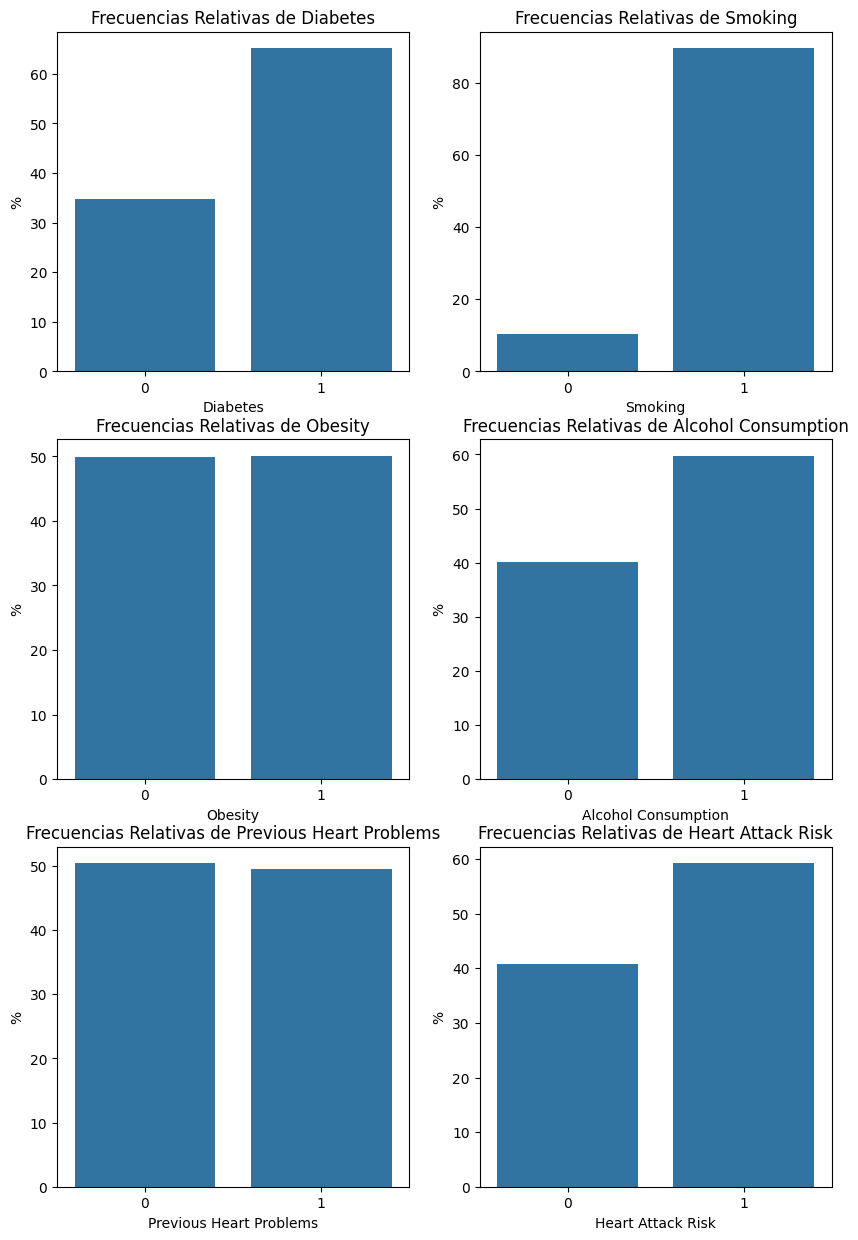

In [28]:
binarias_columnas = ["Diabetes","Smoking","Obesity","Alcohol Consumption","Previous Heart Problems","Heart Attack Risk"]
plot_frecuencias_relativas(df_heart,binarias_columnas)

#### Analizamos las variables numericas mediante los histrogramas y boxplot por cada variable
##### Forma de la distribución: Podemos ver si los datos siguen una forma normal (campana), si están sesgados (hacia la derecha o izquierda), o si son bimodales (dos picos).

##### Detección de valores atípicos (outliers): Las barras separadas o muy alejadas del resto pueden indicar datos extremos.

##### Rango y dispersión: Observamos visualmente entre qué valores se distribuyen los datos y qué tan dispersos están.

##### Densidad de valores: Vemos en qué rangos se concentra la mayor parte de los datos (las barras más altas).

##### Si activamos el parámetro show_kde=True, también se dibuja una curva de densidad, que suaviza el histograma y permite ver mejor la forma general de la distribución.

##### Nos ayuda a decidir si es necesario normalizar o transformar las variables (por ejemplo, aplicar logaritmo si está muy sesgado).

##### Este análisis es un paso clave dentro de la exploración de datos (EDA) porque nos da una primera idea clara de cómo son nuestros datos numéricos.

In [29]:
def plot_histo(df, numericas_columnas, num_bins=10, show_kde=False):
    # Definir el número de gráficas y la cantidad de filas necesarias
    num_columnas = 2
    filas = (len(numericas_columnas) + num_columnas - 1) // num_columnas 
    fig, axes = plt.subplots(filas, num_columnas, figsize=(10, 15))
    axes = axes.flatten()  # Aplanar para facilitar el acceso
    for i, column in enumerate(numericas_columnas):
        sns.histplot(data=df, x=column, bins=num_bins, ax=axes[i], kde=show_kde)     
        axes[i].set_title((f"Histograma de {column}"))
    plt.show()   

In [30]:
df_heart[["Age", "Cholesterol", "Heart Rate", "Exercise Hours Per Week", "Income","Triglycerides"]].describe()

,Age,Cholesterol,Heart Rate,Exercise Hours Per Week,Income,Triglycerides
count,8755.000000,8755.000000,8755.000000,8755.000000,8755.000000,8755.000000
mean,53.710109,259.907938,75.019760,10.013977,158260.555797,417.719475
std,21.249780,80.827869,20.552066,5.783809,80574.380529,223.704091
min,18.000000,120.000000,40.000000,0.002442,20062.000000,30.000000
25%,35.000000,192.000000,57.000000,4.979900,88310.000000,226.000000
50%,54.000000,259.000000,75.000000,10.069559,157866.000000,417.000000
75%,72.000000,330.000000,93.000000,15.050018,227786.500000,612.000000
max,90.000000,400.000000,110.000000,19.998709,299954.000000,800.000000


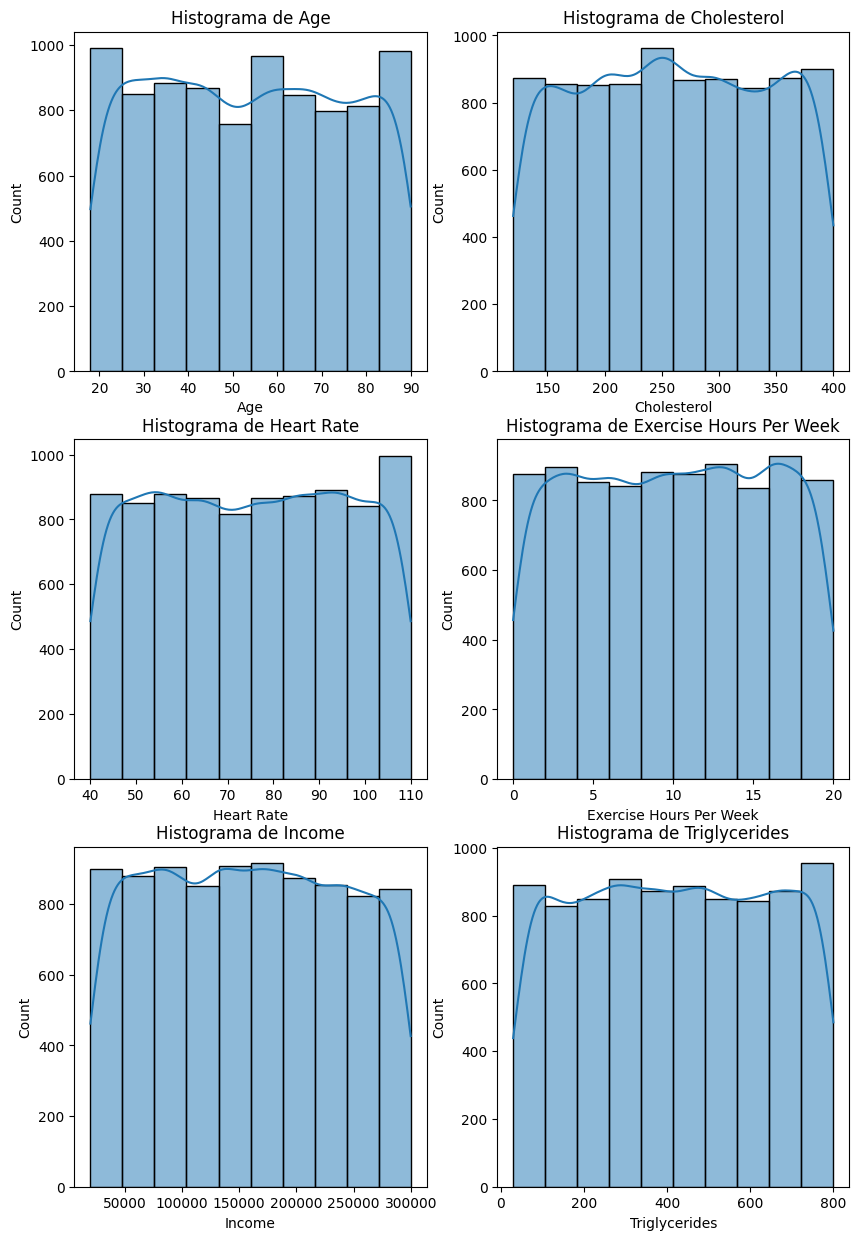

In [31]:
numericas_columnas = ["Age", "Cholesterol", "Heart Rate","Exercise Hours Per Week","Income","Triglycerides"]
plot_histo(df_heart, numericas_columnas,num_bins=10,show_kde=True)

In [32]:
numericas_columnas =  ["Age", "Cholesterol", "Blood Pressure","Heart Rate","Exercise Hours Per Week","Income","Triglycerides"]
print(numericas_columnas)

['Age', 'Cholesterol', 'Blood Pressure', 'Heart Rate', 'Exercise Hours Per Week', 'Income', 'Triglycerides']


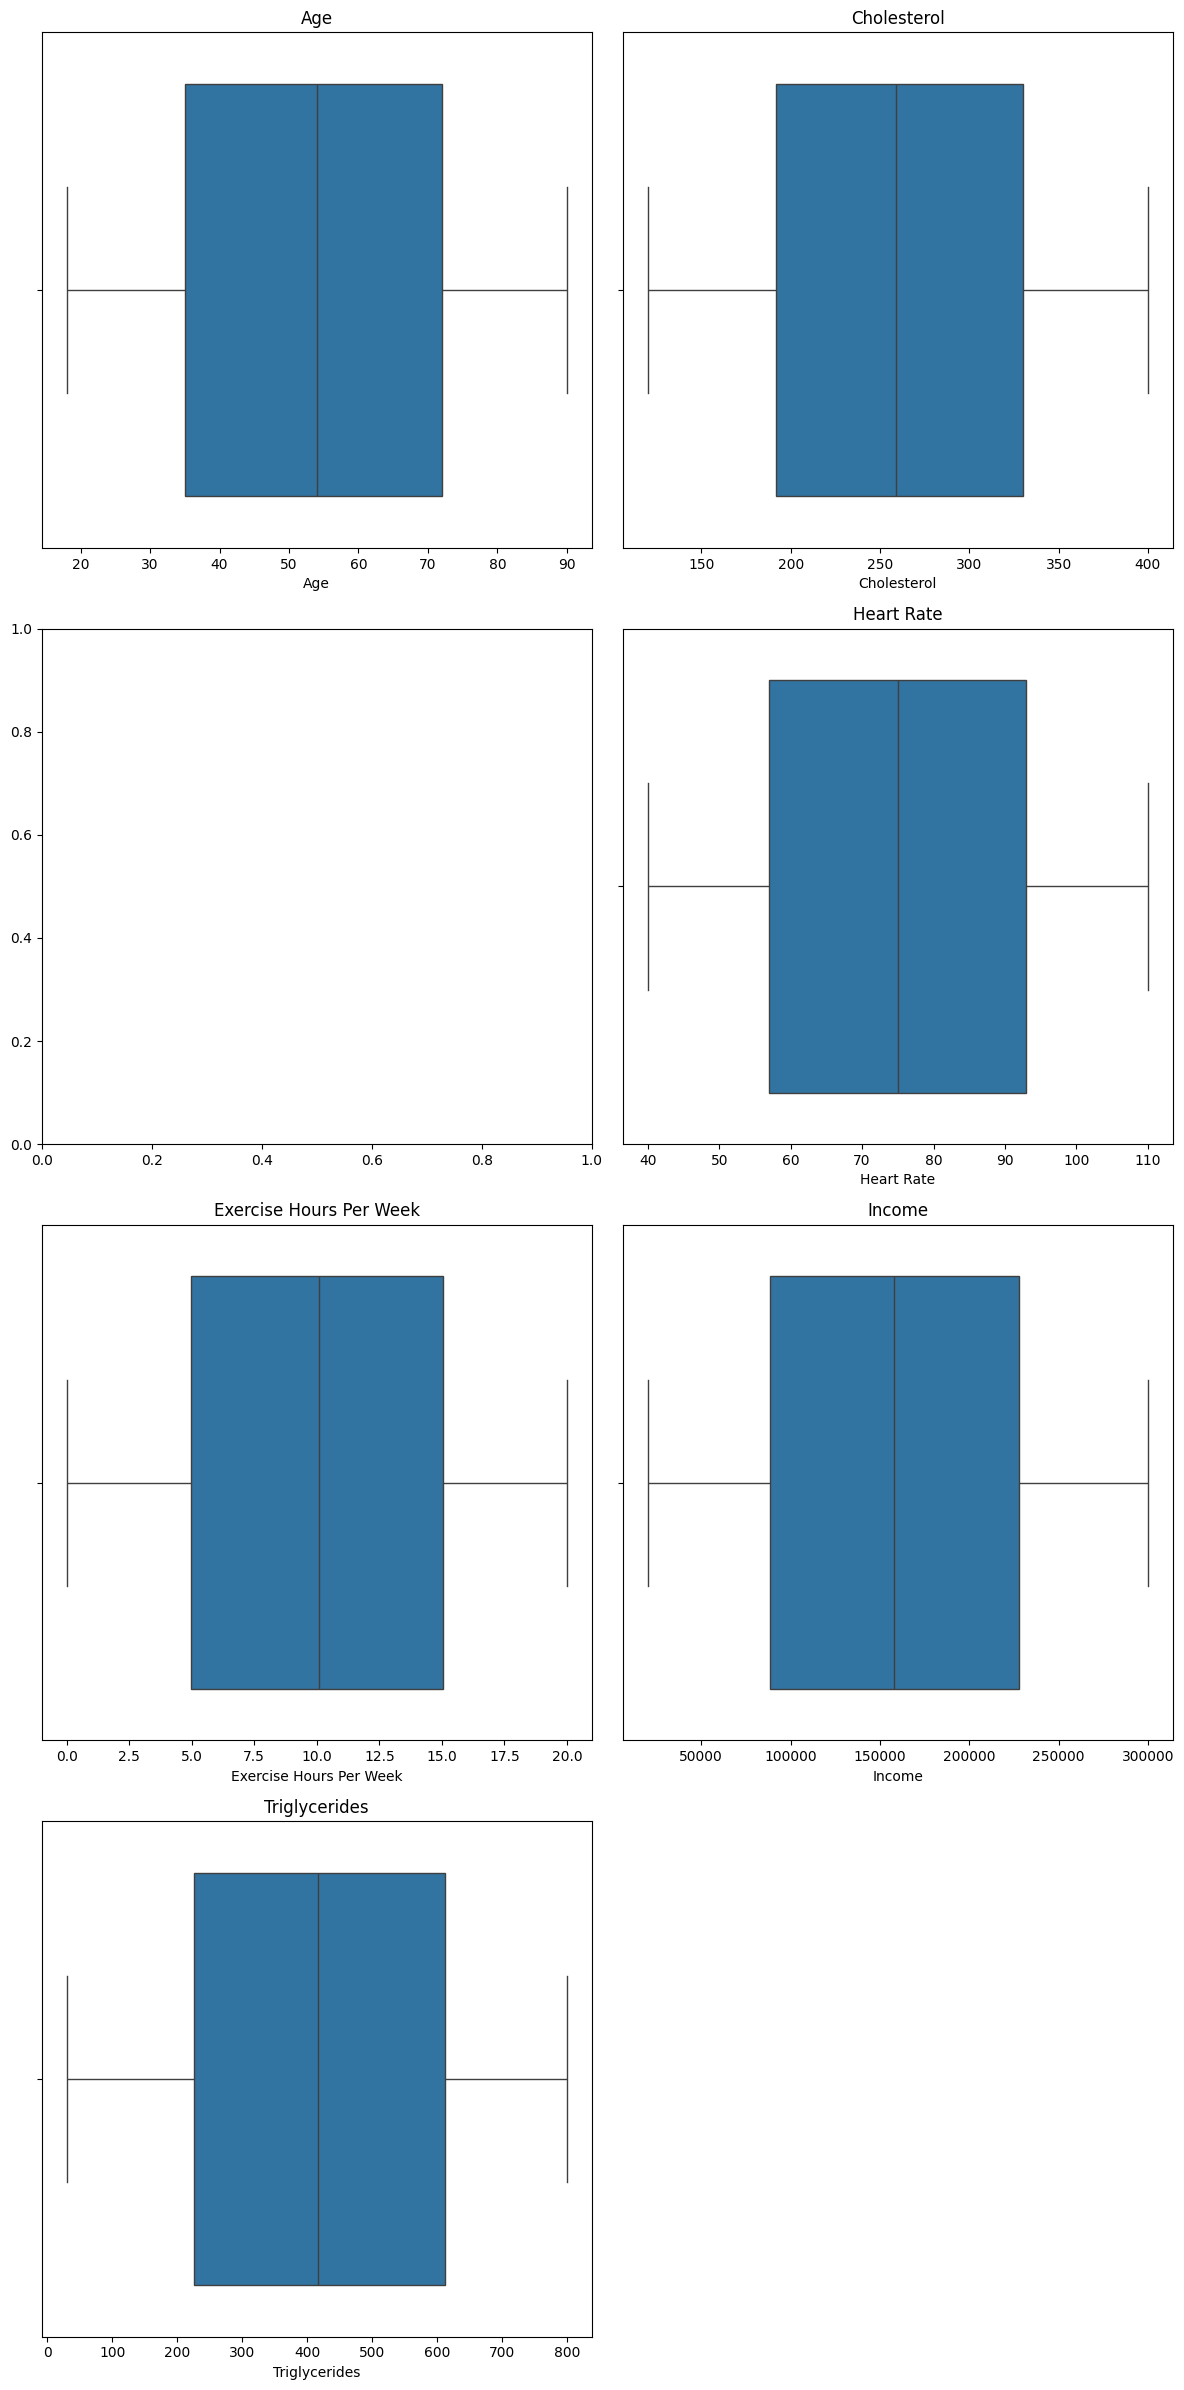

In [33]:
plot_multiple_boxplots(df_heart, numericas_columnas)

### Notas y Conclusiones del analisis univariante
#### Poca dispersión en las variables
En general, las variables numéricas no presentan una gran dispersión, lo que indica que la mayoría de los valores están concentrados en un rango relativamente estrecho.

Esto sugiere que la población del dataset es relativamente homogénea en ciertos aspectos, aunque siempre es importante analizar si esa baja dispersión también puede ocultar efectos sutiles en el riesgo cardiovascular.

#### Análisis variable por variable
Al analizar cada variable de forma individual, podemos entender mejor cómo se distribuyen. Esto es útil para identificar patrones, como:
Variables que son mayoritariamente binarias o categóricas (ejemplo: Smoking, Obesity).

Variables numéricas que muestran tendencias claras (ejemplo: mayoría con colesterol en cierto rango).

Además, permite identificar qué variables podrían tener mayor influencia en el riesgo de ataque al corazón, al comparar la distribución entre pacientes con y sin riesgo.

#### Perfilado por factor de riesgo
Es evidente que es necesario segmentar los análisis por la variable Heart Attack Risk:

Esto permitirá comparar cómo cambian las distribuciones de otras variables (como Diabetes, Obesity, Smoking) entre quienes tienen riesgo y quienes no.

Facilita detectar patrones diferenciales: por ejemplo, si las personas con riesgo tienden a tener mayores valores de presión arterial o colesterol.

#### No se observan outliers destacados
La ausencia de valores atípicos extremos es una buena señal:

Significa que no es necesario aplicar técnicas adicionales de limpieza o transformación para manejar outliers.





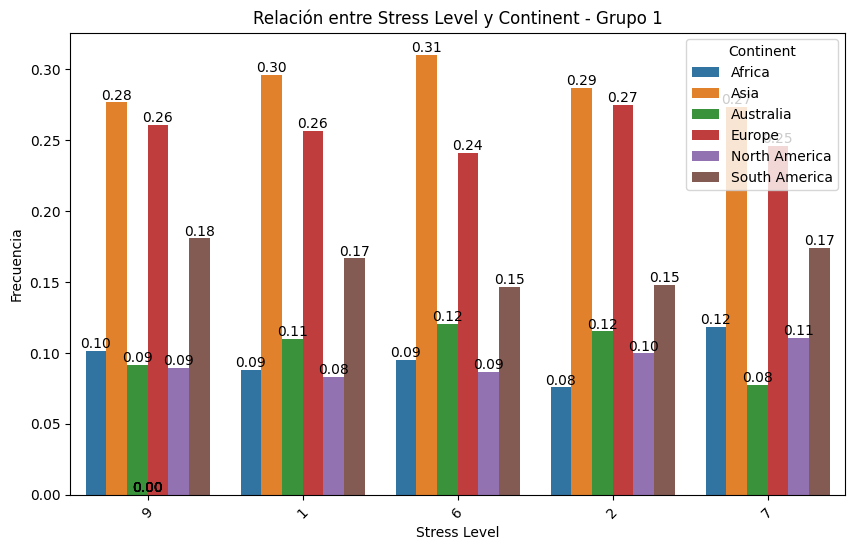

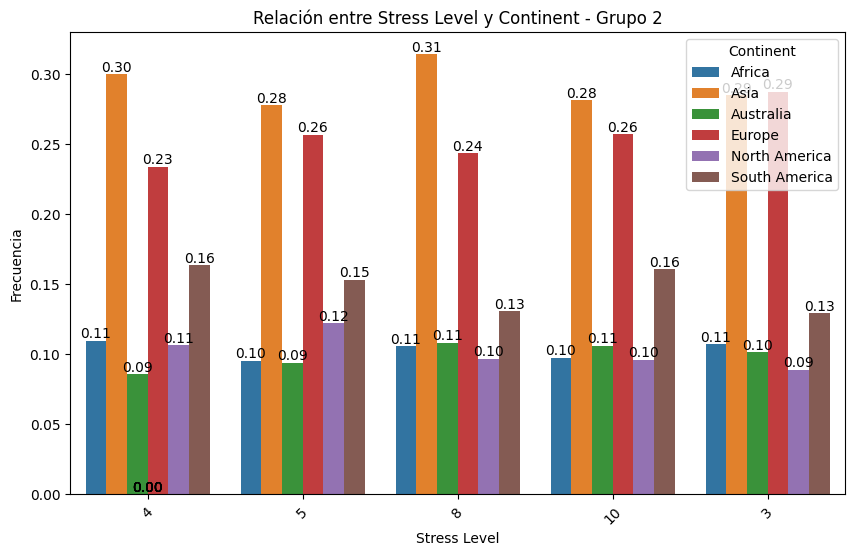

In [34]:
plot_categorical_relationship_fin(df_heart,"Stress Level","Continent", relative_freq = True, show_values = True)

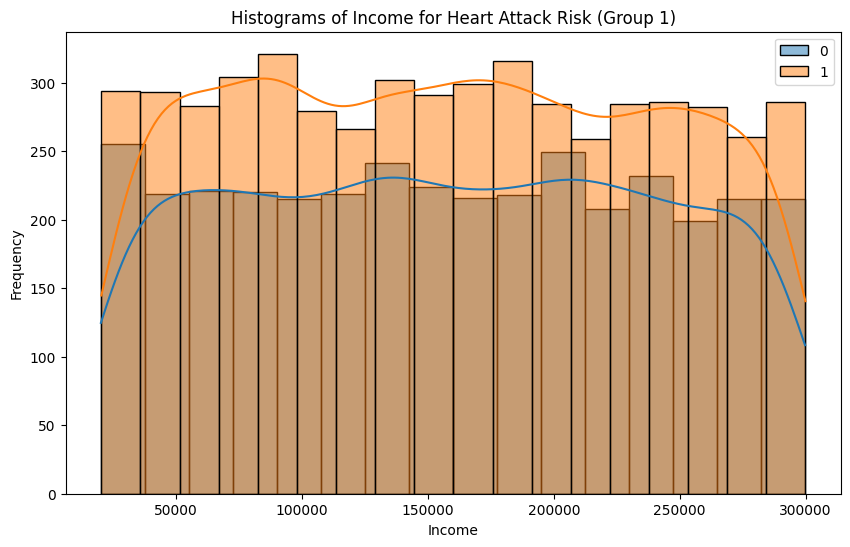

In [35]:
plot_grouped_histograms(df_heart,"Heart Attack Risk", "Income",2)

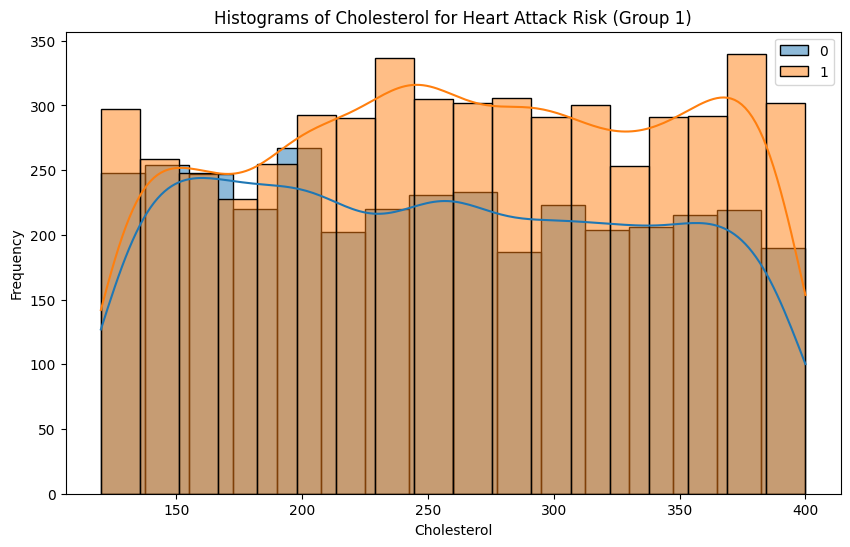

In [36]:
plot_grouped_histograms(df_heart,"Heart Attack Risk", "Cholesterol",2)

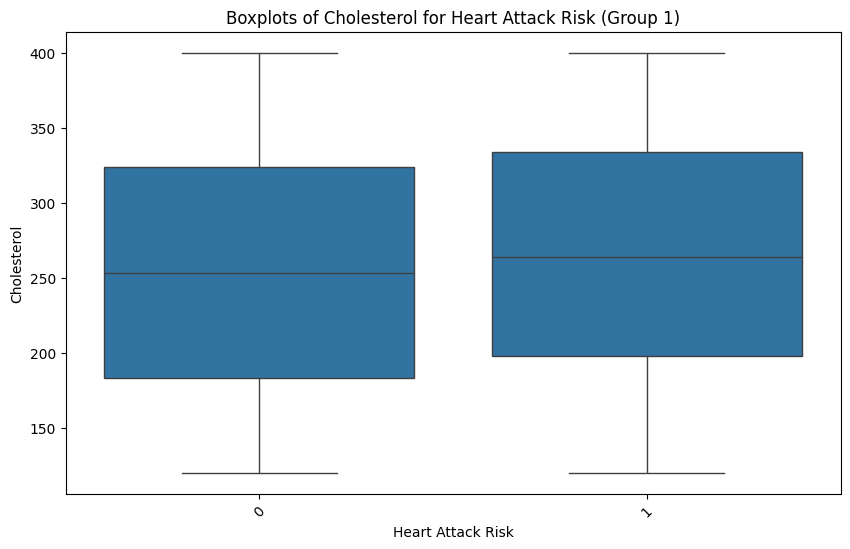

In [37]:
plot_grouped_boxplots(df_heart,"Heart Attack Risk", "Cholesterol")

### Analisis de correlacion variable Triglycerides y Cholesterol
Triglicéridos y colesterol no están correlacionados linealmente en esta muestra.

Aunque ambos por separado sí mostraron diferencias significativas con el riesgo de ataque (según tu análisis anterior), entre ellos no están relacionados.

Ejemplo:

Una persona puede tener triglicéridos altos y colesterol normal.

Otra puede tener colesterol alto y triglicéridos bajos.

Por eso no se observa relación directa entre las dos variables aquí.

* -0.0051 es un valor casi cero --> significa que no hay relación lineal entre los triglicéridos y el colesterol en tu muestra.
* p-valor es 0.6329 (mucho mayor que 0.05) --> esto confirma que la correlación no es estadísticamente significativa.

(2,)


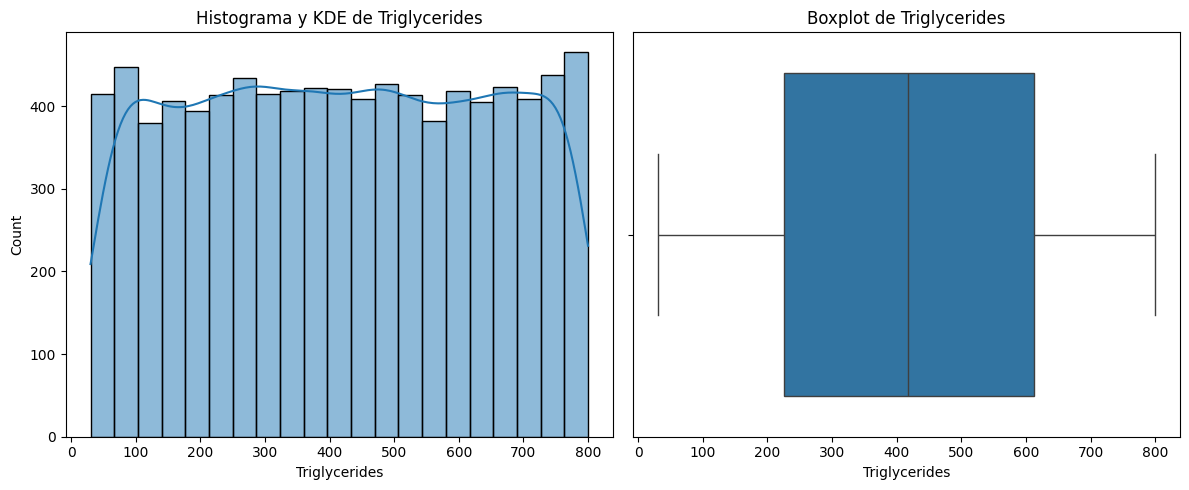

In [38]:
plot_combined_graphs(df_heart,["Triglycerides"])

(2,)


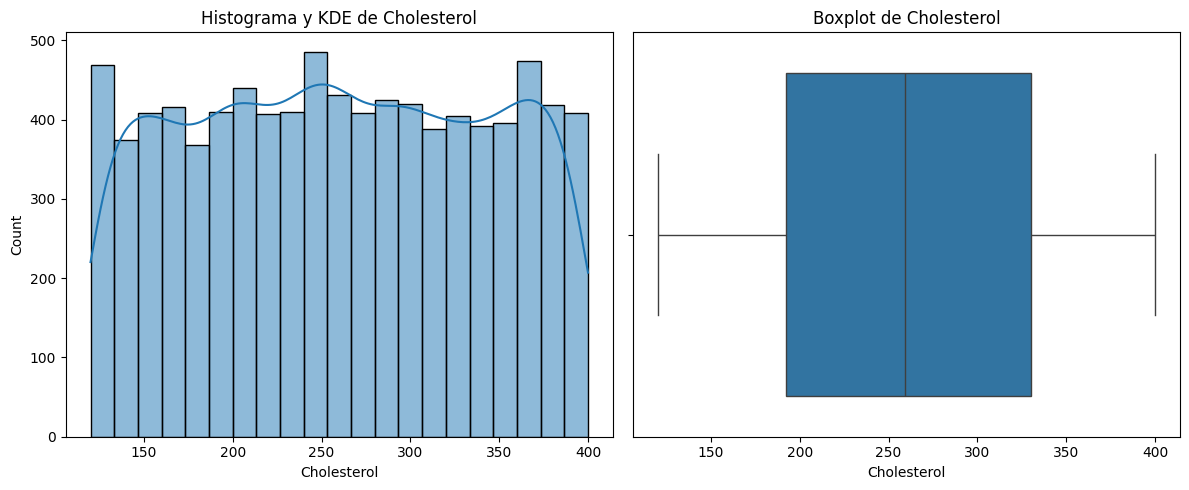

In [39]:
plot_combined_graphs(df_heart,["Cholesterol"])

In [40]:
df_heart[["Triglycerides","Cholesterol"]].describe()

,Triglycerides,Cholesterol
count,8755.000000,8755.000000
mean,417.719475,259.907938
std,223.704091,80.827869
min,30.000000,120.000000
25%,226.000000,192.000000
50%,417.000000,259.000000
75%,612.000000,330.000000
max,800.000000,400.000000


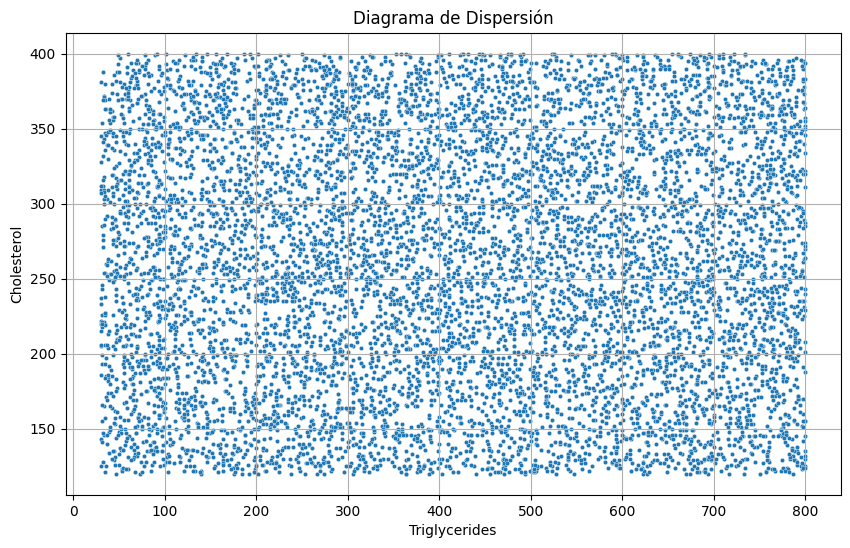

In [41]:
grafico_dispersion_con_correlacion(df_heart,"Triglycerides","Cholesterol", 10)

In [42]:
df_heart[["Triglycerides","Cholesterol"]].corr()

,Triglycerides,Cholesterol
Triglycerides,1.000000,-0.005106
Cholesterol,-0.005106,1.000000


In [43]:
from scipy.stats import pearsonr

pearsonr(df_heart["Triglycerides"], df_heart["Cholesterol"])

PearsonRResult(statistic=np.float64(-0.005105623965480624), pvalue=np.float64(0.6328931256048009))

### Analisis de correlacion Diabetes - Heart Attack Risk

Según la tabla y este resultado:

No hay una relación estadísticamente significativa entre tener diabetes y tener riesgo de ataque cardíaco en este dataset.

Valor Chi-Cuadrado: 1.166 ⇒ Diferencia pequeña

P-Value: 0.28 ⇒ No es significativo (mayor a 0.05).

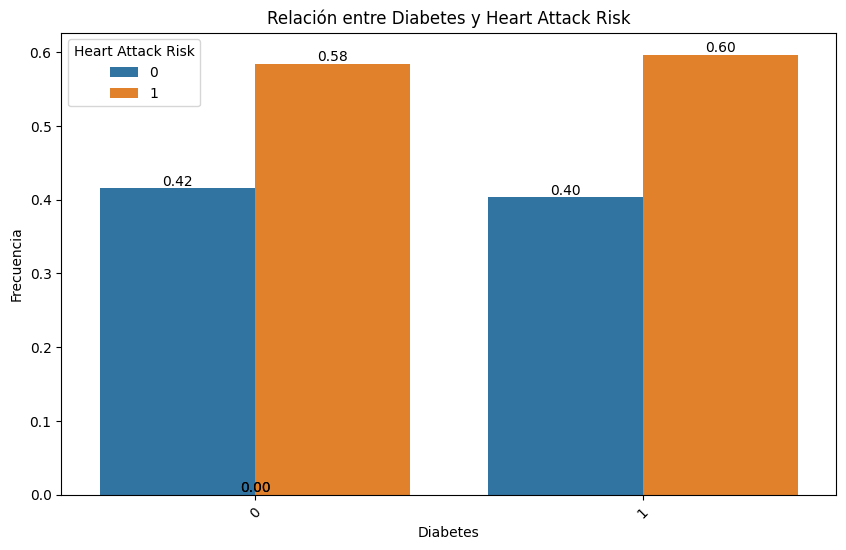

In [44]:
plot_categorical_relationship_fin(df_heart,"Diabetes", "Heart Attack Risk", relative_freq = True, show_values = True)

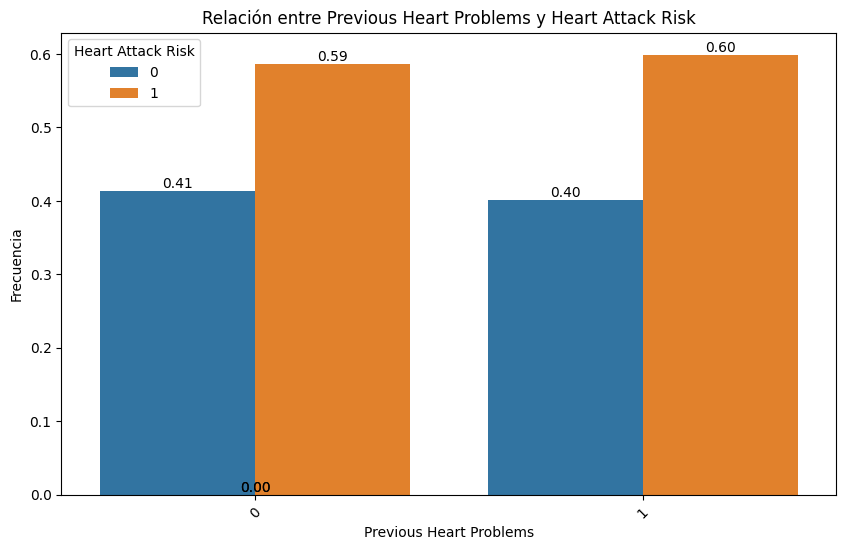

In [45]:
plot_categorical_relationship_fin(df_heart,"Previous Heart Problems", "Heart Attack Risk", relative_freq = True, show_values = True)

In [61]:
tabla_contingencia = pd.crosstab(df_heart['Heart Attack Risk'], df_heart['Diabetes'])

tabla_contingencia

Diabetes,0,1
Heart Attack Risk,,
0,1264,2302
1,1780,3409


In [62]:
from scipy.stats import chi2_contingency

chi2, p, dof, expected = chi2_contingency(tabla_contingencia)


print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p)
print("Grados de Libertad:", dof)
print("Tabla de Frecuencias Esperadas:\n", expected)

Valor Chi-Cuadrado: 1.1666391803688927
P-Value: 0.28009287607366745
Grados de Libertad: 1
Tabla de Frecuencias Esperadas:
 [[1239.8519703 2326.1480297]
 [1804.1480297 3384.8519703]]


## Test de relación entre variables y Heart Attack Risk

Según el análisis en este dataset:

Triglicéridos y colesterol son las dos variables clave que sí presentan diferencias entre las personas con y sin riesgo de ataque cardíaco según tu muestra.

Las demás (edad, ejercicio, ingreso, frecuencia cardíaca) no muestran diferencias significativas en este análisis.

Conclusión: El colesterol y los triglicéridos están claramente asociados con el riesgo.


In [49]:
from scipy.stats import mannwhitneyu
import pandas as pd

# Lista de tus variables numéricas
variables_numericas = ["Age", "Cholesterol", "Triglycerides", "Heart Rate", 
                       "Exercise Hours Per Week", "Income"]

# Crear una tabla para almacenar resultados
resultados = []

# Bucle para cada variable
for var in variables_numericas:
    grupo_a = df_heart.loc[df_heart["Heart Attack Risk"] == 0][var]
    grupo_b = df_heart.loc[df_heart["Heart Attack Risk"] == 1][var]
    
    u_stat, p_valor = mannwhitneyu(grupo_a, grupo_b)
    
    resultados.append({
        "Variable": var,
        "U-Estadístico": u_stat,
        "P-valor": p_valor,
        "Significativo (<0.05)": "Sí" if p_valor < 0.05 else "No"
    })

# Convertir a DataFrame
tabla_resultados = pd.DataFrame(resultados)

# Mostrar tabla ordenada por P-valor
tabla_resultados.sort_values(by="P-valor")

,Variable,U-Estadístico,P-valor,Significativo (<0.05)
2,Triglycerides,8253511.5,8.475531e-18,Sí
1,Cholesterol,8636049.0,1.152694e-07,Sí
0,Age,9134633.5,3.124728e-01,No
4,Exercise Hours Per Week,9167453.0,4.669186e-01,No
5,Income,9224733.5,8.145647e-01,No
3,Heart Rate,9261391.5,9.354898e-01,No


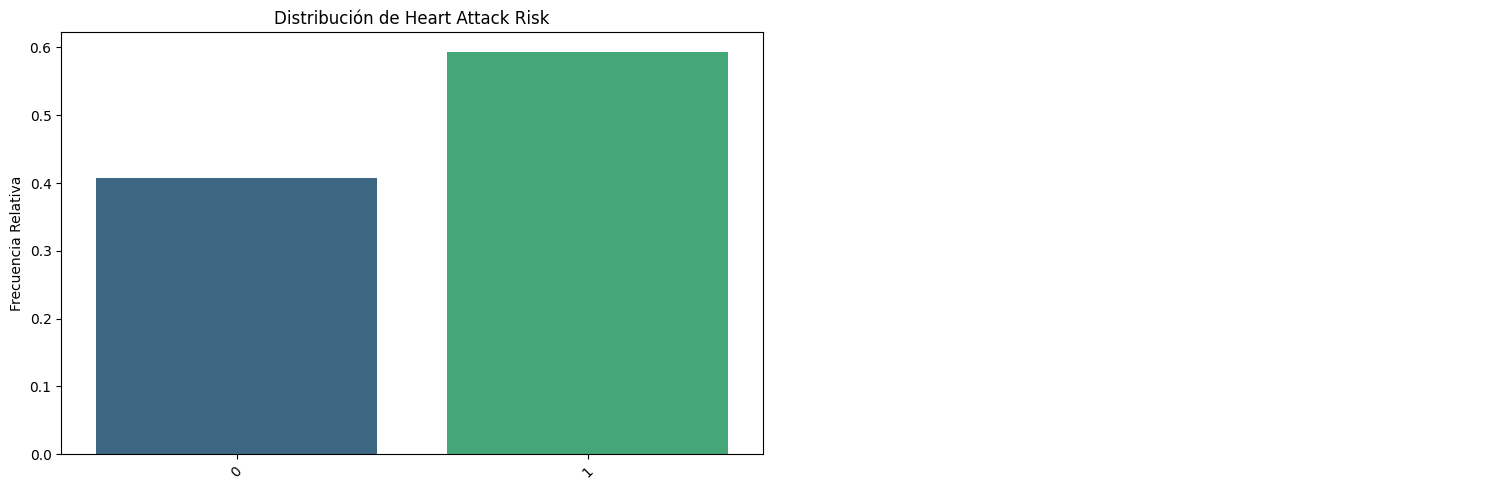

In [50]:
pinta_distribucion_categoricas(df_heart,["Heart Attack Risk"], relativa= True)

(2,)


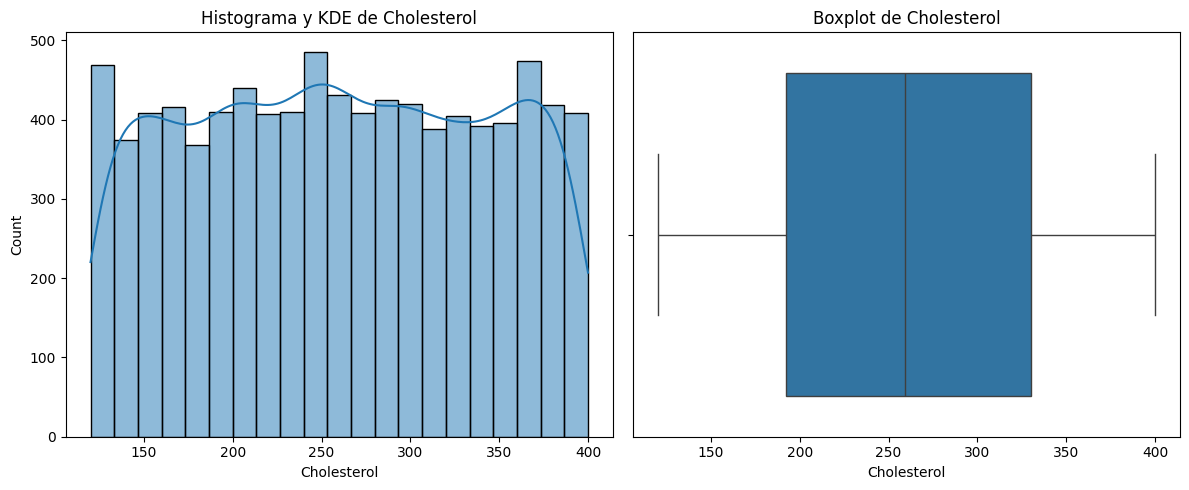

In [53]:
plot_combined_graphs(df_heart,["Cholesterol"])

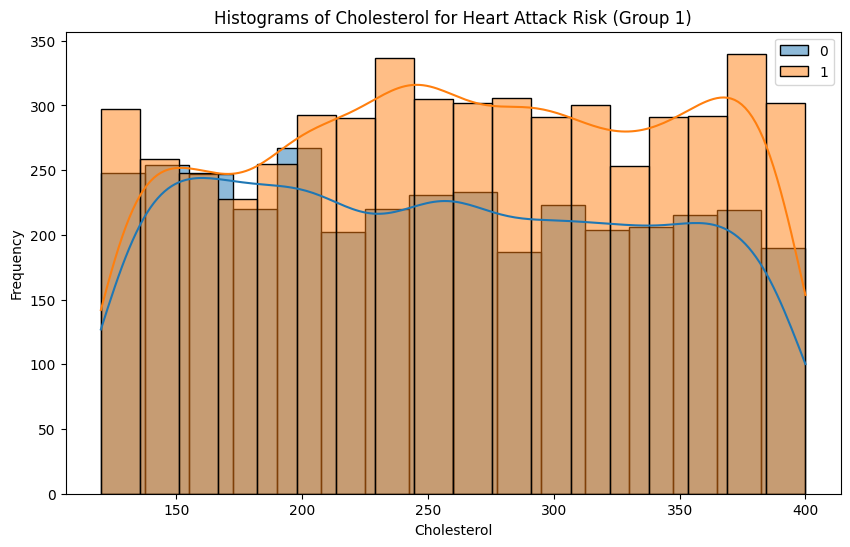

In [52]:
plot_grouped_histograms(df_heart, cat_col="Heart Attack Risk",num_col="Cholesterol", group_size= 2)

(2,)


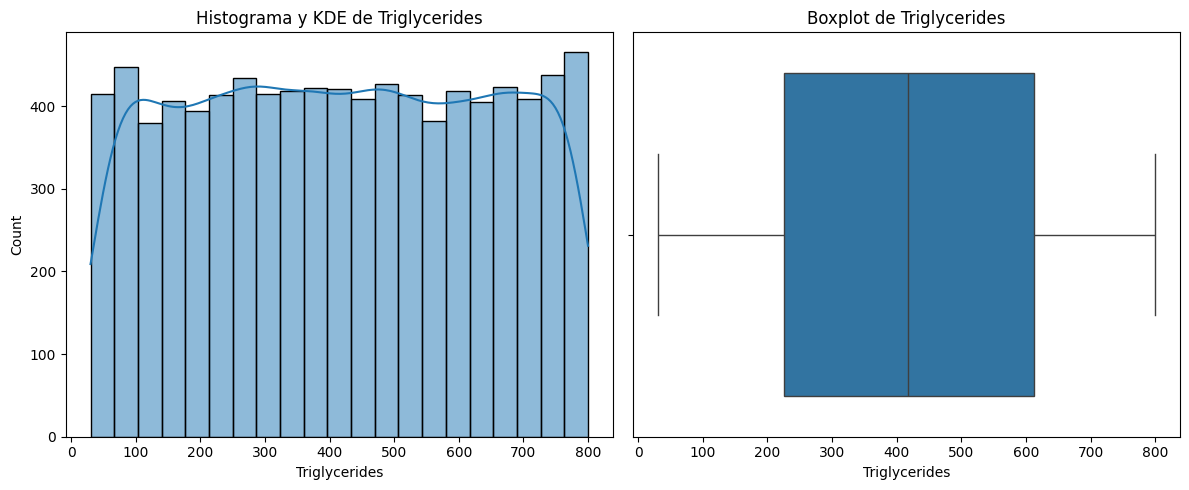

In [54]:
plot_combined_graphs(df_heart,["Triglycerides"])

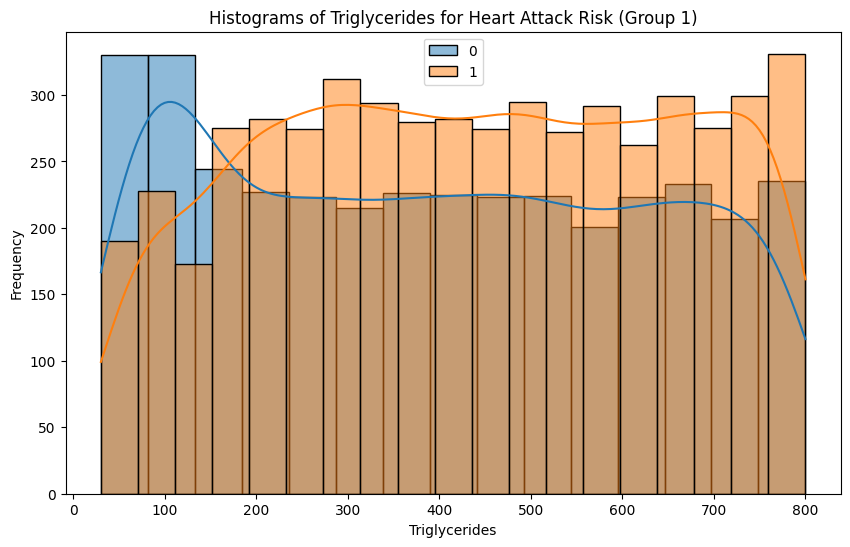

In [55]:
plot_grouped_histograms(df_heart, cat_col="Heart Attack Risk",num_col="Triglycerides", group_size= 2)

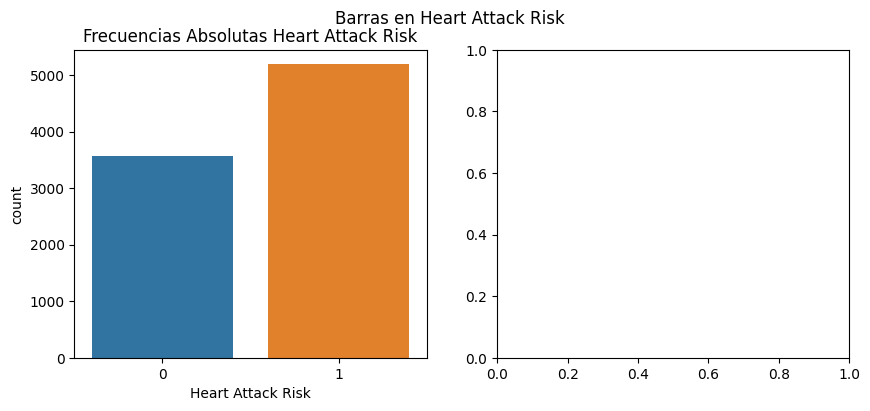

In [106]:
fig,axs = plt.subplots(nrows=1,ncols=2, figsize=(10,4))
fig.suptitle("Barras en Heart Attack Risk");
sns.countplot(x= "Heart Attack Risk", data = df_heart, ax = axs[0], hue = "Heart Attack Risk", legend= False)
axs[0].set_title("Frecuencias Absolutas Heart Attack Risk")
fig;

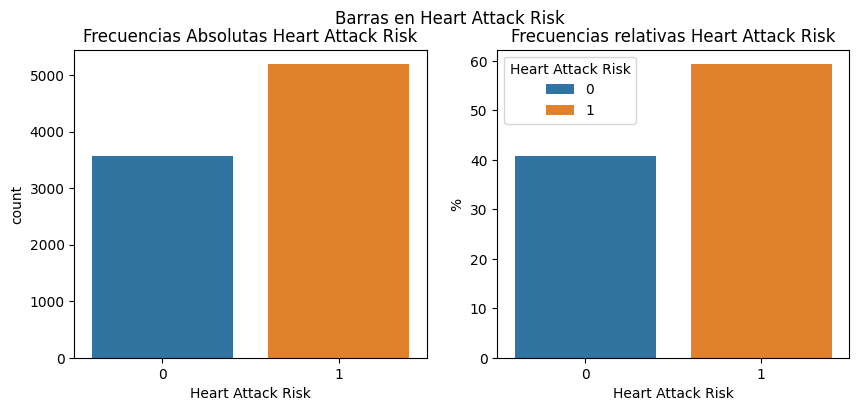

In [111]:
valores = df_heart["Heart Attack Risk"].value_counts(normalize=True) * 100
sns.barplot(x = valores.index, y = valores.values, hue = valores.index, ax = axs[1])
axs[1].set_title("Frecuencias relativas Heart Attack Risk")
axs[1].set_ylabel("%")
fig

### Variable Diet
* Podemos observar que el dataset está muy balanceado respecto a la dieta.
* No parece haber una gran diferencia en la cantidad de personas según su tipo de dieta.

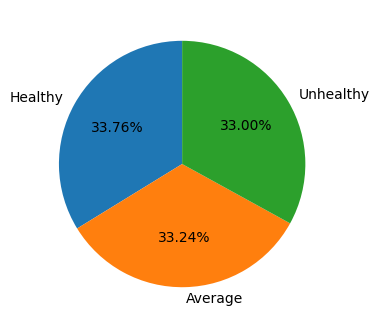

In [112]:
data = df_heart["Diet"].value_counts()

fig,ax = plt.subplots(1,1,figsize = (4,4))

ax.pie(data.values,
        labels=data.index,
        autopct='%.2f%%', startangle= 90);

#### Se observa que el continente Asiático concentra la mayor cantidad de casos con riesgo de ataque cardíaco. Sin embargo, es importante destacar que esta cifra elevada se debe en parte a que Asia representa la mayoría de la muestra analizada. Aun así, la magnitud de los casos en esta región resalta como un foco importante de atención en términos de salud cardiovascular.

In [70]:
frecuencias_absolutas = df_heart["Continent"].value_counts()
frecuencias_absolutas

Continent
Asia             2541
Europe           2240
South America    1361
Australia         883
Africa            871
North America     859
Name: count, dtype: int64

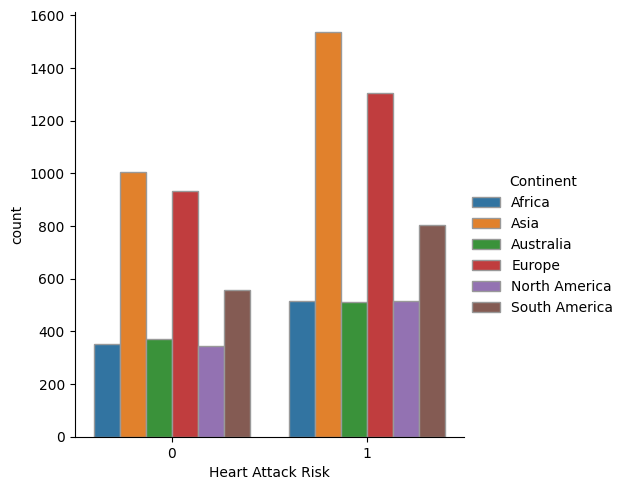

In [68]:
sns.catplot(x="Heart Attack Risk",
            hue="Continent",
            kind="count",
            edgecolor=".6",
            orient="V",
            data=df_heart.sort_values("Continent"));

In [73]:
frecuencias_absolutas = df_heart["Diabetes"].value_counts()
frecuencias_absolutas

Diabetes
1    5711
0    3044
Name: count, dtype: int64

#### Se observa que el género masculino y la presencia de diabetes son factores que parecen estar significativamente asociados con un mayor riesgo de ataque cardíaco en el conjunto de datos analizado.

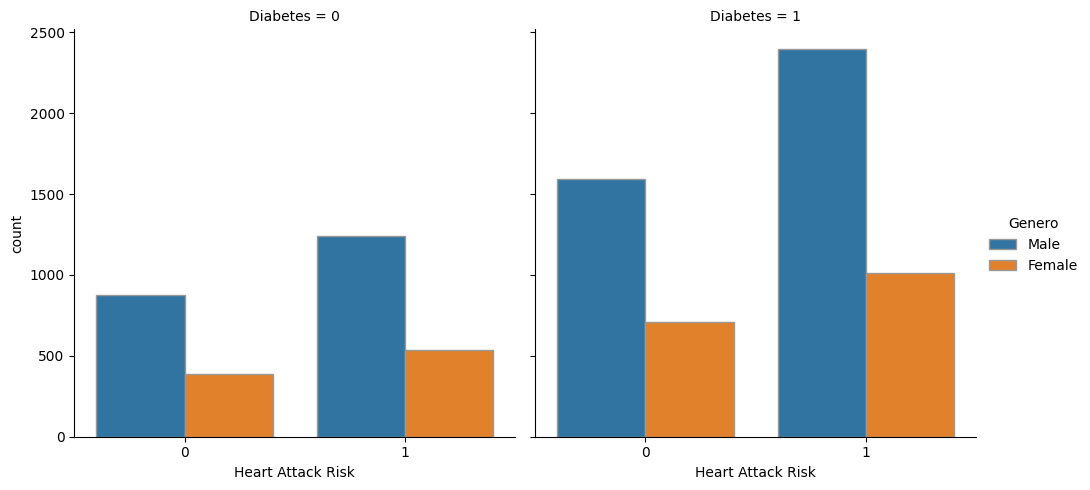

In [77]:
sns.catplot(x="Heart Attack Risk",
            col = "Diabetes",
            kind="count",
            edgecolor=".6",
            orient = "V",
            hue = "Genero",
            legend= True,
            data=df_heart);

### Los resultados indican de forma clara que tener diabetes y, además, ser fumador aumenta considerablemente las probabilidades de sufrir un ataque cardíaco. Esta combinación de factores representa un riesgo cardiovascular significativo.

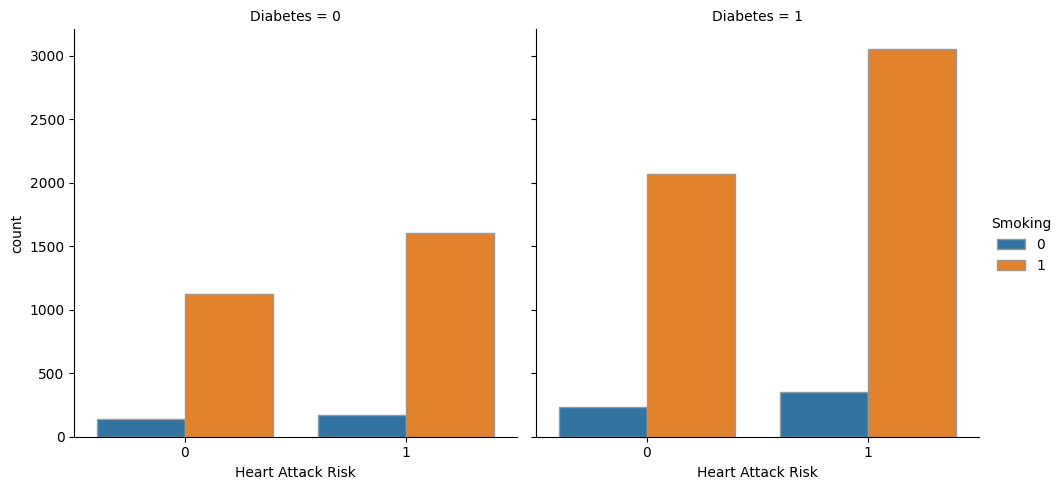

In [78]:
sns.catplot(x="Heart Attack Risk",
            col = "Diabetes",
            kind="count",
            edgecolor=".6",
            orient = "V",
            hue = "Smoking",
            legend= True,
            data=df_heart);

### La obesidad está fuertemente relacionada con la presencia de diabetes y el hábito de fumar.

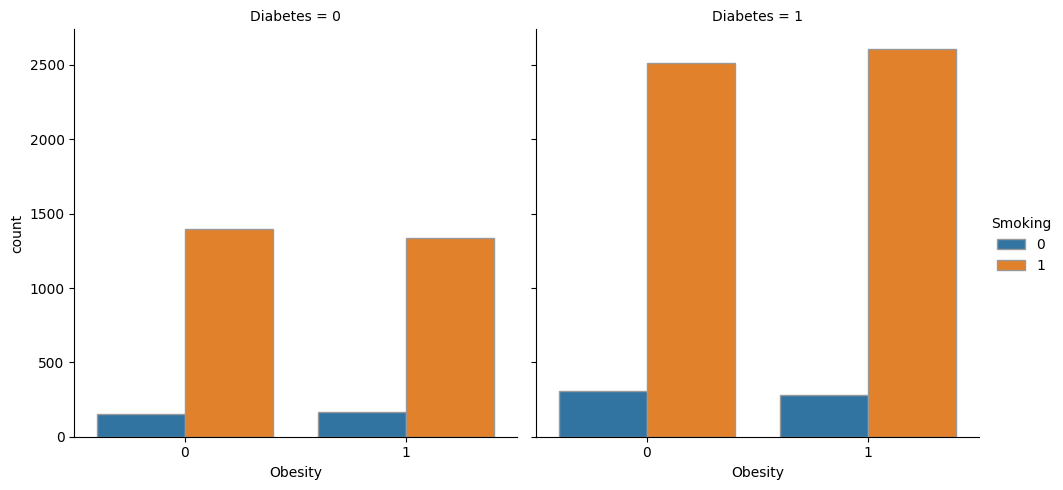

In [95]:
sns.catplot(x="Obesity",
            col = "Diabetes",
            kind="count",
            edgecolor=".6",
            orient = "V",
            hue = "Smoking",
            legend= True,
            data=df_heart);

#### Se observa una relación marcada: las personas que fuman tienen una alta probabilidad de también padecer diabetes. 

In [80]:
tabla_contingencia = pd.crosstab(df_heart["Smoking"],
            df_heart["Diabetes"],
            margins = False)
tabla_contingencia

Diabetes,0,1
Smoking,,
0,314,588
1,2730,5123


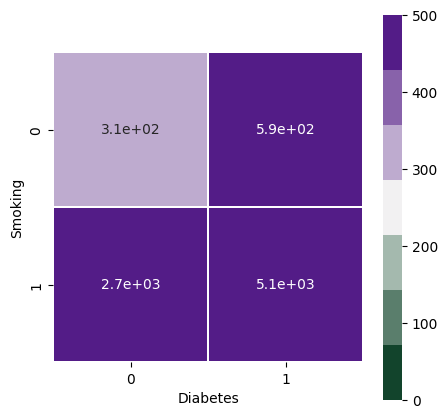

In [81]:
plt.figure(figsize=(5,5))
sns.heatmap(tabla_contingencia,
            vmin = 0,
            vmax = 500,
            cmap=sns.diverging_palette(145, 280, s=85, l=25, n=7),
            square=True,
            linewidths=.1,
            annot=True);

#### Se observa que los niveles de colesterol y triglicéridos en la muestra del dataset son alarmantemente elevados. Esto es preocupante, considerando que los valores recomendados son inferiores a 200 mg/dL para el colesterol y menores a 150 mg/dL para los triglicéridos. La presencia generalizada de cifras por encima de estos umbrales sugiere un riesgo significativo de enfermedades cardiovasculares entre la población analizada.

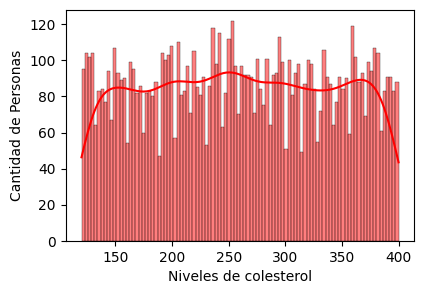

In [120]:
fig,axs = plt.subplots(1,1,figsize= (4.5,3))
sns.histplot(df_heart["Cholesterol"],
             kde=True,
             color='r',
             bins=100, ax = axs) # Otra forma, sin recurrir al dataframe como argumento
axs.set_xlabel("Niveles de colesterol")
axs.set_ylabel("Cantidad de Personas");

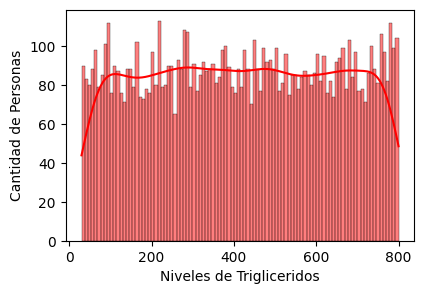

In [121]:
fig,axs = plt.subplots(1,1,figsize= (4.5,3))
sns.histplot(df_heart["Triglycerides"],
             kde=True,
             color='r',
             bins=100, ax = axs) # Otra forma, sin recurrir al dataframe como argumento
axs.set_xlabel("Niveles de Trigliceridos")
axs.set_ylabel("Cantidad de Personas");

#### El boxplot de los ingresos revela que no existen outliers significativos, lo que sugiere que la distribución de los ingresos en esta muestra es relativamente homogénea. Además, la mayoría de los datos se concentran dentro de un rango estrecho, lo que indica que la gran parte de la población en el dataset tiene ingresos similares y no presenta grandes disparidades en este aspecto.

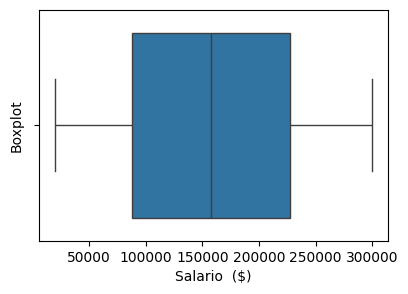

In [254]:
fig,axs = plt.subplots(1,1,figsize= (4.5,3))
sns.boxplot(x = "Income", data = df_heart);
axs.set_xlabel("Salario  ($)")
axs.set_ylabel("Boxplot");

#### Se evidencia que niveles bajos de triglicéridos están claramente asociados con un menor riesgo de sufrir un ataque cardiaco, mientras que a medida que los triglicéridos aumentan, la probabilidad de riesgo también se incrementa notablemente. Esto refuerza la importancia de mantener controlados los niveles de triglicéridos como una medida preventiva clave contra las enfermedades cardiovasculares.

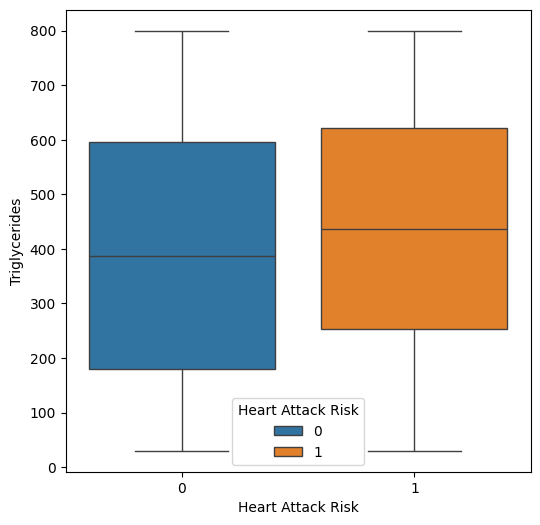

In [127]:
plt.figure(figsize=(6,6))
sns.boxplot(x = "Heart Attack Risk",
            y = "Triglycerides",
            hue = "Heart Attack Risk",
            data=df_heart);

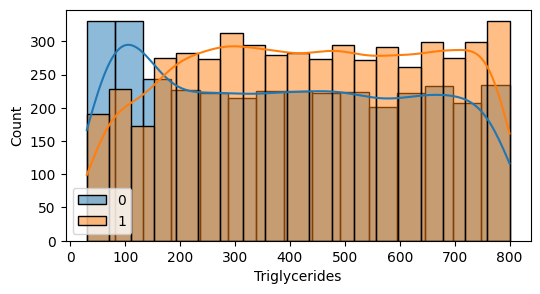

In [129]:
variable_categorica = "Heart Attack Risk"
variable_numerica = "Triglycerides"

plt.figure(figsize=(6,3))
for valor in df_heart[variable_categorica].unique():  
    sns.histplot(df_heart.loc[df_heart[variable_categorica] == valor,variable_numerica], kde= True, label=valor)
plt.legend();

#### Este otro análisis confirma de forma contundente que los niveles elevados de colesterol y triglicéridos están claramente asociados con un mayor riesgo de sufrir un ataque cardiaco. Las personas con valores altos en estos indicadores muestran una frecuencia notablemente superior en el grupo de alto riesgo, reforzando la importancia de controlar estos factores para la prevención cardiovascular.

In [156]:
def plot_histrograma(df, category, numeric):
    plt.figure(figsize=(6, 3))  # El tamaño se puede ajustar
    num_columnas = 3
    filas = (len(numeric) + num_columnas - 1) // num_columnas 
    for valor in df[category].unique():  
        sns.histplot(df.loc[df[category] == valor, numeric], kde=True, label=valor)
    plt.legend()
    plt.xlabel(numeric)
    plt.title(f'Histograma de {numeric}')
    plt.show()

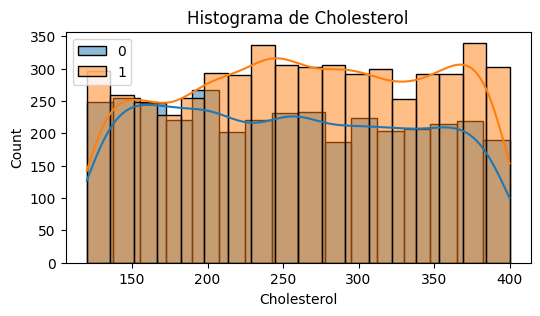

In [157]:
plot_histrograma(df_heart,"Heart Attack Risk", "Cholesterol")

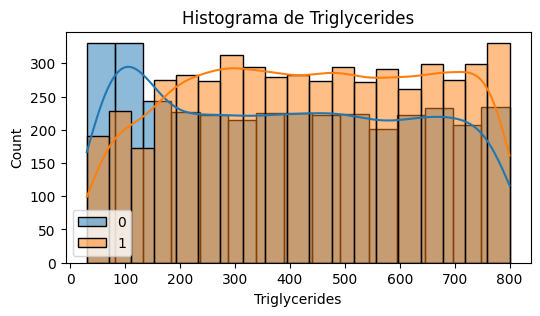

In [158]:
plot_histrograma(df_heart,"Heart Attack Risk", "Triglycerides")

#### Se observa que los niveles de colesterol se distribuyen de manera bastante equilibrada entre los distintos niveles de estrés, sin que un grupo destaque significativamente sobre los demás. Esto sugiere que, en esta muestra, el estrés no parece tener un impacto marcado sobre el colesterol total acumulado.

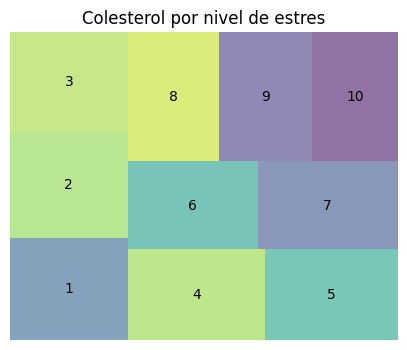

In [160]:
import squarify 

variable_categorica = "Stress Level"
variable_numerica = "Cholesterol"
operacion_agregacion = "sum"

datos = df_heart.groupby(variable_categorica, as_index = False).agg({variable_numerica: operacion_agregacion})

plt.figure(figsize = (5,4))
squarify.plot(sizes = datos[variable_numerica], label = datos[variable_categorica], alpha = 0.6)
plt.title("Colesterol por nivel de estres")
plt.axis("off");

#### En el análisis de correlación realizado sobre las variables numéricas del dataset, no se identifican relaciones significativas entre ellas. Esto indica que factores como la edad, el colesterol, los triglicéridos, el ritmo cardíaco, las horas de ejercicio y el ingreso económico no presentan una dependencia directa entre sí en esta muestra. Por lo tanto, cada una de estas variables parece actuar de forma independiente como posible factor de riesgo, y su impacto sobre la salud cardiovascular debe analizarse de forma individual y no como parte de un patrón correlacionado.

In [171]:
variables_numericas
matriz_corr = df_heart[variables_numericas].corr(numeric_only=True)
matriz_corr

,Age,Cholesterol,Triglycerides,Heart Rate,Exercise Hours Per Week,Income
Age,1.000000,-0.008995,0.003654,-0.004097,0.001162,-0.001203
Cholesterol,-0.008995,1.000000,-0.005106,0.000502,0.022560,-0.000149
Triglycerides,0.003654,-0.005106,1.000000,0.011643,0.001297,0.010167
Heart Rate,-0.004097,0.000502,0.011643,1.000000,0.008040,0.004898
Exercise Hours Per Week,0.001162,0.022560,0.001297,0.008040,1.000000,-0.023594
Income,-0.001203,-0.000149,0.010167,0.004898,-0.023594,1.000000


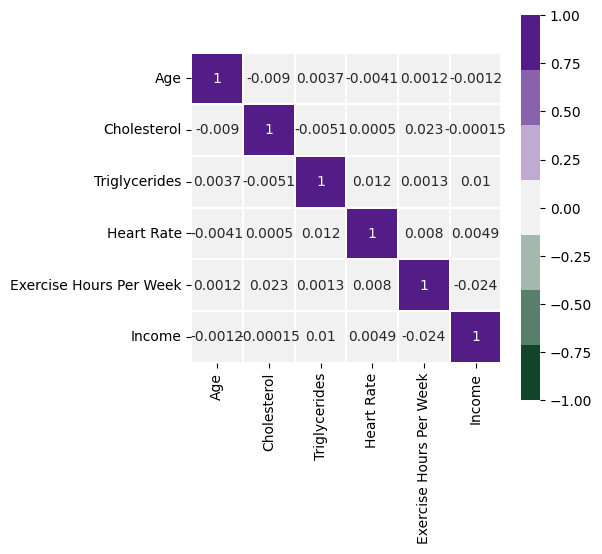

In [173]:

plt.figure(figsize=(5,5))
sns.heatmap(matriz_corr,
            vmin=-1,
            vmax=1,
            cmap=sns.diverging_palette(145, 280, s=85, l=25, n=7),
            square=True,
            linewidths=.1,
            annot=True);

#### Fumar se confirma como un factor que eleva notablemente el riesgo de ataque cardiaco, sin importar la dieta que se siga. Incluso entre quienes llevan una dieta saludable, los fumadores muestran más casos de riesgo en comparación con los no fumadores. La combinación de tabaquismo y dieta poco saludable potencia aún más la cantidad de personas en riesgo, lo que refuerza la necesidad de atacar el hábito de fumar como prioridad en la prevención cardiovascular.

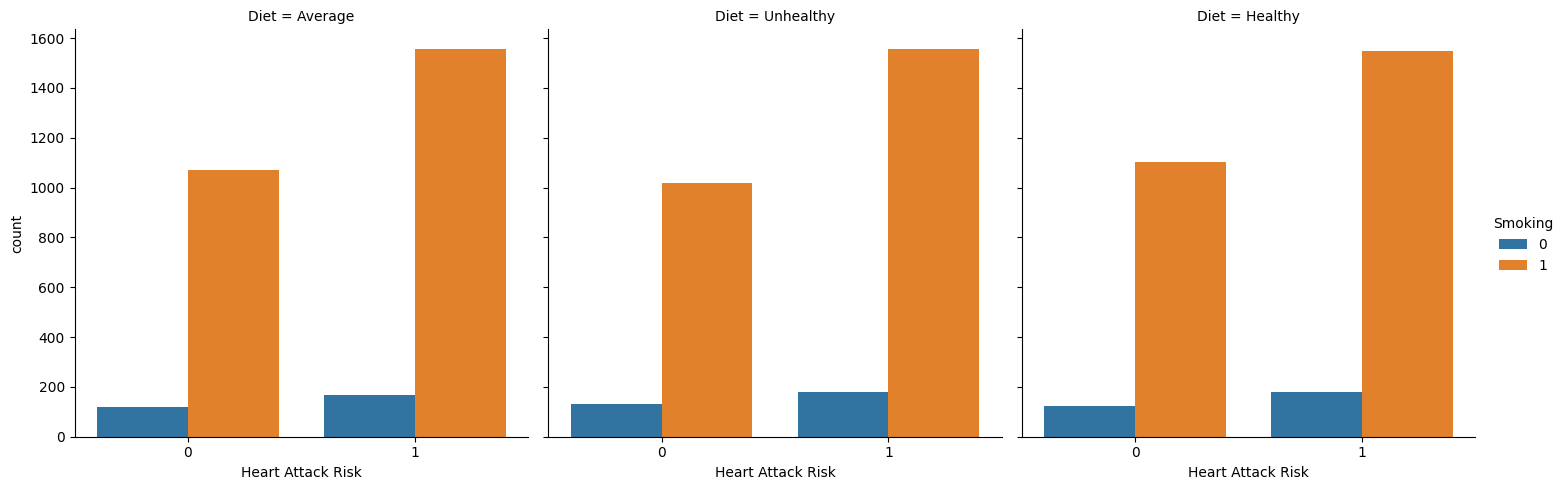

In [196]:
sns.catplot(x= "Heart Attack Risk", col = "Diet", hue = "Smoking", data = df_heart, kind = "count");

#### El riesgo de ataque cardiaco se dispara en personas que combinan diabetes con antecedentes de problemas cardíacos previos. Incluso entre quienes solo tienen diabetes, el riesgo sigue siendo alto, pero la presencia de problemas cardíacos previos actúa como un multiplicador claro del peligro

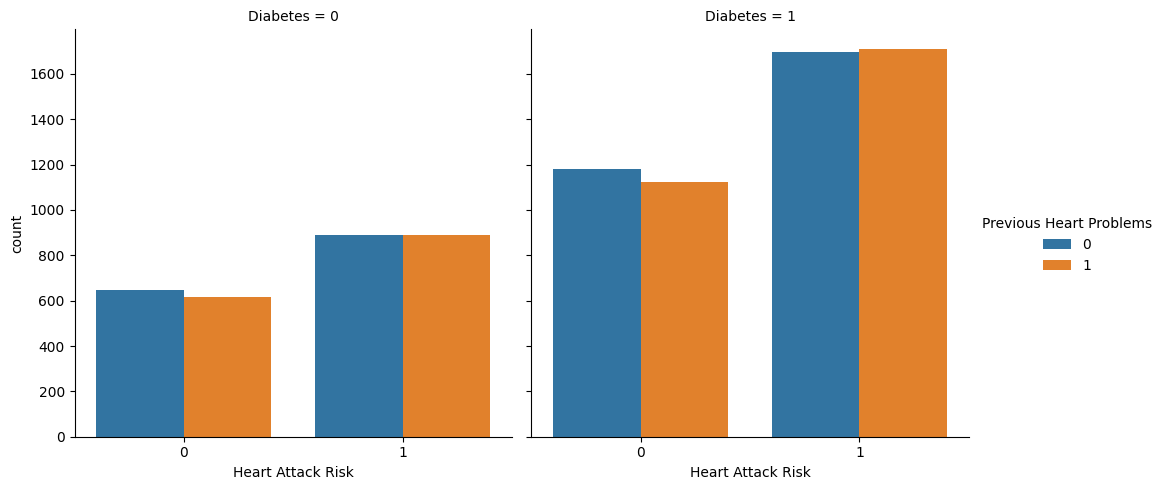

In [197]:
sns.catplot(x= "Heart Attack Risk", col = "Diabetes", hue = "Previous Heart Problems", data = df_heart, kind = "count");

#### Este análisis revela que los hombres, especialmente aquellos con diabetes, presentan un riesgo significativamente mayor de sufrir un ataque cardíaco en comparación con las mujeres. Esta diferencia de riesgo por género es consistente y resalta la necesidad de enfocarse particularmente en la salud cardiovascular de los hombres diabéticos.

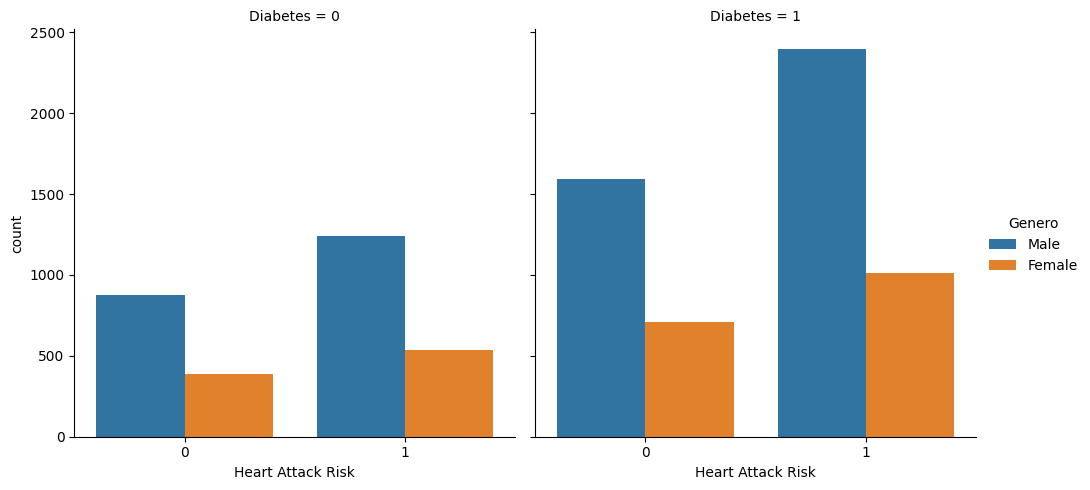

In [198]:
sns.catplot(x= "Heart Attack Risk", col = "Diabetes", hue = "Genero", data = df_heart, kind = "count");

#### El análisis muestra que las personas que más fuman en este dataset son mayores de 40 años, y dentro de este grupo, el riesgo de ataque cardíaco es notablemente mayor. Esto confirma que el tabaquismo, especialmente en edades avanzadas, es un factor clave que agrava el riesgo cardiovascular. La combinación de edad y hábito de fumar se presenta como una amenaza crítica para la salud cardíaca.

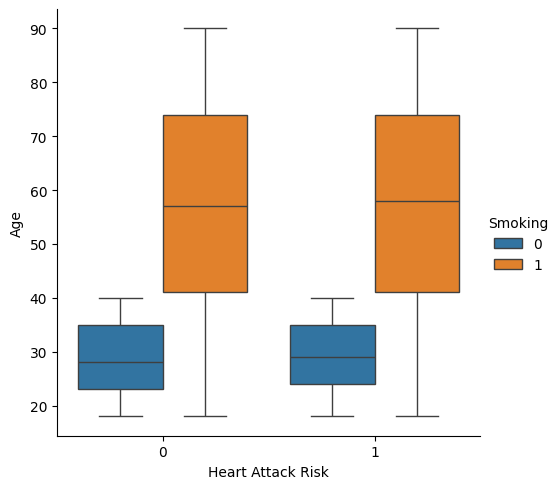

In [202]:
sns.catplot(x = "Heart Attack Risk", y = "Age", hue = "Smoking", data = df_heart, kind = "box");

#### Se observa que las personas con dietas no saludables presentan niveles de triglicéridos más elevados, y dentro de este grupo, el riesgo de ataque cardíaco es considerablemente mayor. Esto refuerza la relación directa entre una mala alimentación, el aumento de triglicéridos y la probabilidad de sufrir un evento cardíaco. Mantener una dieta saludable aparece como un factor clave para reducir el riesgo

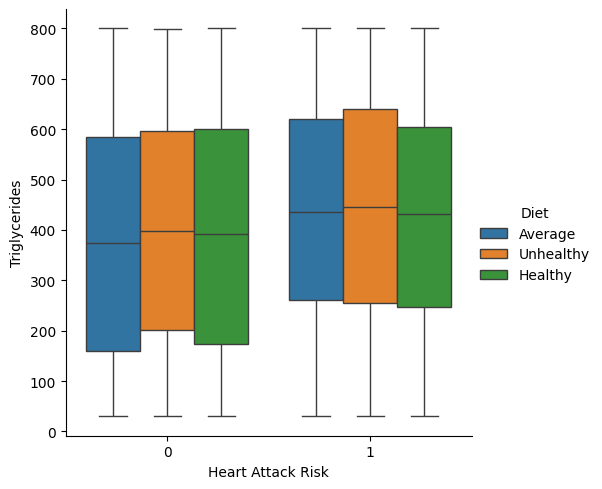

In [212]:
sns.catplot(x = "Heart Attack Risk", y = "Triglycerides", hue = "Diet", data = df_heart, kind = "box");

#### Los niveles de triglicéridos son consistentemente más elevados en personas con antecedentes familiares de enfermedades cardíacas, especialmente entre aquellos con riesgo de ataque cardíaco. Esto refuerza la idea de que la combinación de herencia genética y niveles altos de trigliceridos potencia considerablemente el riesgo cardiovascular.

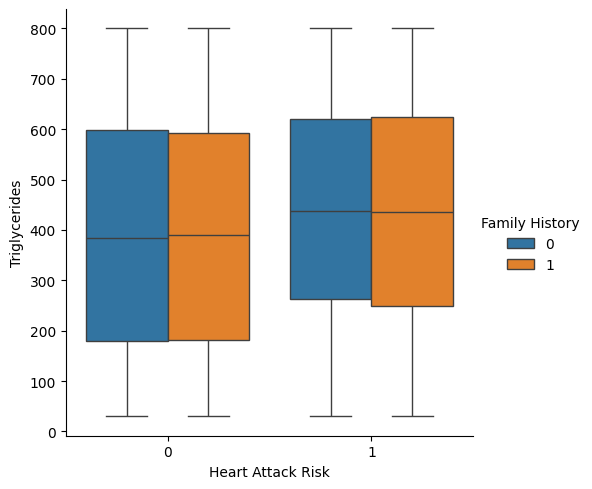

In [216]:
sns.catplot(x = "Heart Attack Risk", y = "Triglycerides", hue = "Family History", data = df_heart, kind = "box");